# SBU CSE 352 - HW 1.2 - Search: Solving a Maze Using a Goal-based Agent


All student names in group: James Nanas, Zachary Lowinger, Stanley Yu

I understand that my submission needs to be my own group's work: JN, ZL, SY

I understand that ChatGPT / Copilot / other AI tools are not allowed: JN, ZL, SY

---

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [2]:
# First download the repo and change the directory to be the one where the dependencies are.
# You should only need to do this once per session. If you want to reset, do Runtime -> Disconnect and Delete Runtime
# You can always do !pwd to see the current working directory and !ls to list current files.
!git clone https://github.com/stanleybak/CS7320-AI.git
%cd CS7320-AI/Search
!ls

c:\Users\zacma\Downloads\CS7320-AI\Search


Cloning into 'CS7320-AI'...
c:\Users\zacma\OneDrive\Desktop\CSE 352\myenv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
# if the below fails to open, then small_maze.txt is not in the current working directory (see above code block)
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [14]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

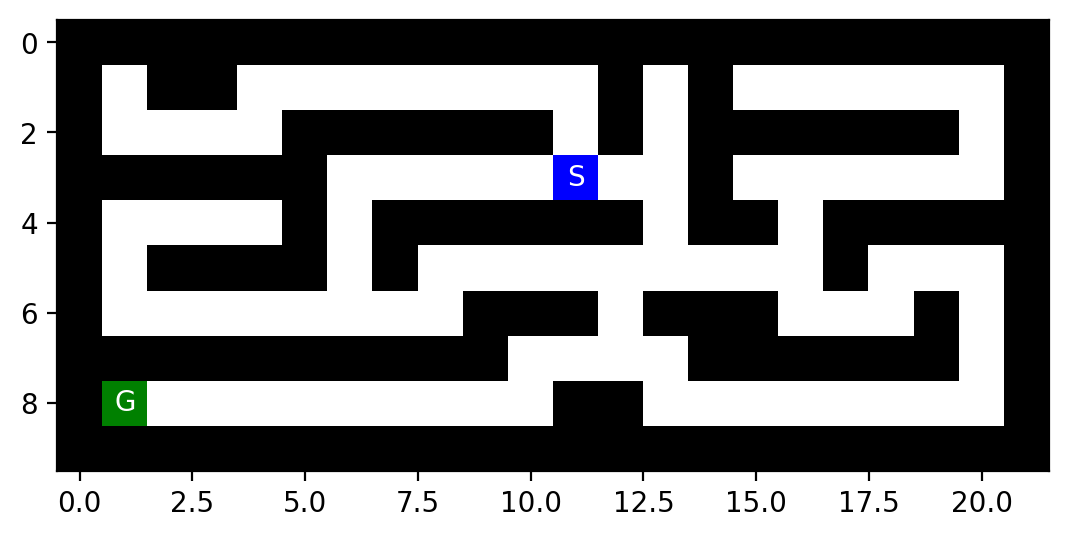

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [16]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [17]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage:
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one.
        Caution: there is no error checking!

        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)

        Returns:
        a tupple (x, y) for the found position.

    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).

    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array

    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.

    welcome()
        Welcome message.

FILE
    c:\users\zacma\downloads\cs7320-ai\search\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [18]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
2. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

# Your answer goes here

Initial State: The Start Node
Actions: Move 1 unit in any direction that hasn't been covered already that isn't part of a wall
Transition Model: The point at where moving one unit leads to, provided that it is a valid action
Goal State: The End node
Path Cost: The length of such a path from the start node to the end node

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

# Your answer goes here
n: spaces on the maze that are traversable * 4 directions
d: depth of optimal solution should be distance between the start and finish nodes, moving up,down,left,right only
m:The maximum possible depth should be the entire traversable maze
b:The maximum branching factor should be 3 directions for each node, since you can go 4 directions but we don't backtrack so only 3

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [19]:
# Your code goes here
from collections import deque
#Problem class holds the states and information needed for the search algorithm
#Has a isGoal class to compare a state(coordinate tuple) with the Goal state
class Problem:
    def __init__(self,initial,goal,maze):
        self.initial = initial #Initial coordinate state
        self.goal = goal#goal coordinate state
        self.maze = maze #parsed maze
        #self.correctNodes = []

    def isGoal(self,state):
        if state == self.goal:
            return True
        return False
#Solution object with the final node (or None) and other data needed to easily print out stats
#has str method for printing
class Solution:
    def __init__(self,solution,nodes_expanded,max_depth, max_mem,max_frontier):
        self.solution = solution #solution returned by method
        self.nodes_expanded = nodes_expanded
        self.max_depth = max_depth #=depth = Cost
        self.max_mem = max_mem
        self.max_frontier = max_frontier
    def __str__(self):
        return f"solution :{self.solution}, nodes expanded: {self.nodes_expanded}, max depth: {self.max_depth}, max mem:{self.max_mem}, max frontier:{self.max_frontier}"
    def outputAllVars(self):
        return (self.solution, self.nodes_expanded, self.max_depth, self.max_mem, self.max_frontier)
#Marks Frontier Nodes with the appropriate value given a problem object
def markFrontierNodes(problem,frontier):
    maze = problem.maze
    for node in frontier:
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0],node.pos[1]] = 6
    return
#Marks Solution Nodes with the appropriate value given a problem object
def markSolutionNodes(problem,solution):
    maze = problem.maze
    sol_arr = solution.solution.get_path_from_root()
    #print(sol_arr)
    for node in sol_arr:
        #print(node)
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0], node.pos[1]] = 4
    return
#this chooses potential child nodes, which are nodes that
#are not blocked (marked with X)
#Returns an array of node objects
def expand(problem,node):

    maze = problem.maze
    valid_children = []
    test_children = [
    [tuple([node.pos[0],node.pos[1] + 1]),mh.look(maze, (node.pos[0],node.pos[1] + 1)), 'right'],
    [tuple([node.pos[0],node.pos[1] - 1]),mh.look(maze, (node.pos[0], node.pos[1] - 1)), 'left'],
    [tuple([node.pos[0] + 1,node.pos[1]]),mh.look(maze, (node.pos[0] + 1, node.pos[1])), 'down'],
    [tuple([node.pos[0] - 1,node.pos[1]]),mh.look(maze, (node.pos[0] - 1, node.pos[1])), 'up']]

    for questionable_child in test_children:
        if(questionable_child[1]!= 'X' and questionable_child[0]!= node.pos):
            valid_children.append(Node(questionable_child[0],node,questionable_child[2],node.cost+1))
    return valid_children

#Problem has start, isGoal method, initial
def breadth_first(problem):
    node = Node(problem.initial, None, None, 0)  # node.pos is state
    solution = Solution(problem.initial, 0, 0, 1, 1)
    frontier = deque()
    frontier.append(node)
    reached = [problem.initial]

    if (problem.isGoal(node.pos)): return solution  # do graph stuff(?)
    while len(frontier) != 0:
        node = frontier.popleft()
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0], node.pos[1]] = 5
        if (len(frontier) + len(reached)) > solution.max_mem:
            solution.max_mem = len(frontier) + len(reached)
        solution.nodes_expanded = solution.nodes_expanded + 1
        if (node.cost > solution.max_depth):
            solution.max_depth = node.cost
        for child in expand(problem, node):
            s = child.pos
            if (problem.isGoal(s)):
                solution.solution = child
                markFrontierNodes(problem,frontier)
                markSolutionNodes(problem,solution)

                return solution
            if not s in reached:
                reached.append(s)
                frontier.append(child)
                if (len(frontier) > solution.max_frontier):
                    solution.max_frontier = len(frontier)

    return None  # returns failure
#compares pos for each element
def is_in_arr(path,node):
    pos = node.pos
    for path_node in path:
        if(pos == path_node.pos):
            return True
    return False

def depth_first(problem):
    node = Node(problem.initial,None,None,0) #node.pos is state
    solution = Solution(problem.initial, 0, 0, 1, 1)
    frontier = deque([node])

    if (problem.isGoal(node.pos)): return solution
    while len(frontier)!= 0:
        node = frontier.popleft()
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0], node.pos[1]] = 5

        if (len(frontier)) > solution.max_mem:
            solution.max_mem = len(frontier)
        solution.nodes_expanded = solution.nodes_expanded + 1

        if (node.cost > solution.max_depth):
            solution.max_depth = node.cost
        for child in expand(problem, node):
            s = child.pos
            if (problem.isGoal(s)):
                solution.solution = child
                markFrontierNodes(problem, frontier)
                markSolutionNodes(problem, solution)

                return solution
            path = node.get_path_from_root()
            if(not is_in_arr(path,child)):

                frontier.append(child)
                if (len(frontier) > solution.max_frontier):
                    solution.max_frontier = len(frontier)
    return None #returns failure



How does BFS and DFS deal with loops (cycles)?

# Discussion
BFS has a "reached" data structure that stores each node that has been visited. If the nodes have been visited,
it will no longer be considered as a possible solution by the algorithm and thus helps avoid visited nodes being visited
more than 1 time, thus avoiding loops. For each possible child element in DFS, the algorithm checks for cycles by
determining if a node being considered is in the possible solution path. If so, it ignores that node, thus avoiding
loops.


Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?


The BFS implementation appears to be complete and optimal,since BFS will eventually find a solution and it appears that all paths found are the
least cost path. Space and Time complexity should be O(b^m) where b is branching factor and m is depth
 Depth first search is not complete because it may not find a solution. It is also not optimal since in some cases it will not find the optimal
 solution, but rather finds the path that the algorithm finds first in most cases(although that is debatable here since the path seems to be optimal for these examples).
 Space complexity is O(bm) and time complexity should be O(b^m)




## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [20]:
# Your code goes here
#returns the cost
#goal= problem.goal
#node = node object
def calc_cost(node, goal):
    costT = tuple([abs(goal[0] - node.pos[0]), abs(goal[1] - node.pos[1])])
    return costT[0] + costT[1]

def greedy_best_fs(problem):
    node = Node(problem.initial, None, None, 0)  # node.pos is state
    frontier = []  # Priority queue, total cost+estimated cost
    frontier.append([calc_cost(node, problem.goal), node])
    reached = [problem.initial]
    solution = Solution(problem.initial, 0, 0, 1, 1)

    while len(frontier) != 0:
        node = frontier.pop(0)[1]
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0], node.pos[1]] = 5
        if (len(frontier) + len(reached)) > solution.max_mem:
            solution.max_mem = len(frontier) + len(reached)

        if (node.cost > solution.max_depth):
            solution.max_depth = node.cost
        if(problem.isGoal(node.pos)):
            solution.solution = node
            frontierNodes = []
            for frontierN in frontier:
                frontierNodes.append(frontierN[1])

            markFrontierNodes(problem, frontierNodes)
            markSolutionNodes(problem, solution)

            return solution
        solution.nodes_expanded = solution.nodes_expanded + 1
        for child in expand(problem, node):
            s = child.pos
            if not s in reached:
                goal = problem.goal
                # calculate cost based on adding difference between x,y
                cost = calc_cost(child, goal)
                reached.append(s)
                frontier.append([cost, child])
                frontier.sort(key=lambda x: x[0])
                if (len(frontier) > solution.max_frontier):
                    solution.max_frontier = len(frontier)

    return None  # returns failure

def aStar(problem):
    node = Node(problem.initial, None, None, 0)  # node.pos is state
    frontier = []  # Priority queue, total cost+estimated cost
    frontier.append([calc_cost(node, problem.goal), node])
    reached = [problem.initial]
    solution = Solution(problem.initial, 0, 0, 1, 1)

    while len(frontier) != 0:
        node = frontier.pop(0)[1]
        if (node.pos != problem.initial and node.pos != problem.goal):
            maze[node.pos[0], node.pos[1]] = 5
        if (len(frontier) + len(reached)) > solution.max_mem:
            solution.max_mem = len(frontier) + len(reached)

        if (node.cost > solution.max_depth):
            solution.max_depth = node.cost
        if(problem.isGoal(node.pos)):
            solution.solution = node
            frontierNodes = []
            for frontierN in frontier:
                frontierNodes.append(frontierN[1])

            markFrontierNodes(problem, frontierNodes)
            markSolutionNodes(problem, solution)

            return solution
        solution.nodes_expanded = solution.nodes_expanded + 1
        for child in expand(problem, node):
            s = child.pos
            prevCost = node.cost
            if not s in reached:
                goal = problem.goal
                # calculate cost based on adding difference between x,y
                cost = calc_cost(child, goal) + prevCost
                reached.append(s)
                frontier.append([cost, child])
                frontier.sort(key=lambda x: x[0])
                if (len(frontier) > solution.max_frontier):
                    solution.max_frontier = len(frontier)
    return None  # returns failure

Are your implementations complete and optimal? What is the time and space complexity?


# Discussion

A* seems to be optimal, and complete as it finds a solution, and appears to find the most optimal solution.
 Time and  complexity should be  O(b^m)
 Greedy best first search seems to be complete as it worked on the one maze where
DFS did not work but it is not optimal as seen by the small maze example.
 Time complexity should be O(b^m), while the space complexity should be O(bm)

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [23]:
# Open all maze file and store in list to iterate
mazeList = []

with open("small_maze.txt", "r") as f:
    maze_str = f.read()

smallMaze = mh.parse_maze(maze_str)
mazeList.append(('Small Maze' ,smallMaze))

with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

emptyMaze = mh.parse_maze(maze_str)
mazeList.append(('Empty Maze' ,emptyMaze))

with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

emptyMaze2 = mh.parse_maze(maze_str)
mazeList.append(('Empty Maze 2' ,emptyMaze2))

with open("L_maze.txt", "r") as f:
    maze_str = f.read()

LMaze = mh.parse_maze(maze_str)
mazeList.append(('L Maze' ,LMaze))

with open("large_maze.txt", "r") as f:
    maze_str = f.read()

largeMaze = mh.parse_maze(maze_str)
mazeList.append(('Large Maze' , largeMaze))

with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

loopsMaze = mh.parse_maze(maze_str)
mazeList.append(('Loops Maze' ,loopsMaze))

with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

mediumMaze = mh.parse_maze(maze_str)
mazeList.append(('Medium Maze' ,mediumMaze))

with open("open_maze.txt", "r") as f: #Problem here 
    maze_str = f.read()

openMaze = mh.parse_maze(maze_str)
mazeList.append(('Open Maze' ,openMaze))

with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

wallMaze = mh.parse_maze(maze_str)
mazeList.append(('Wall Maze' ,wallMaze))

print(len(mazeList))

9


Small Maze : 



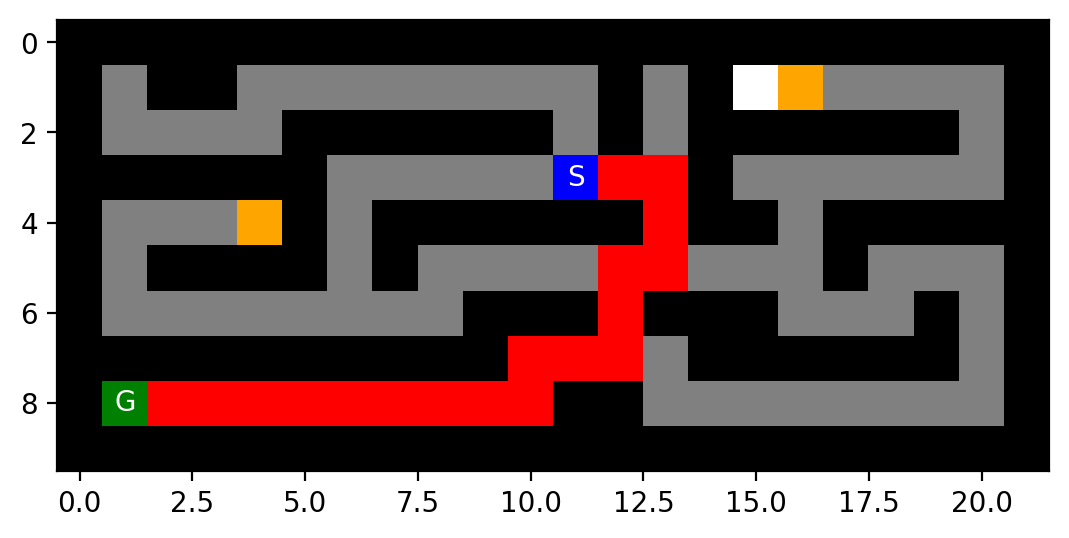

bfs:  solution :Node - pos = (8, 1); action = left; cost = 19, nodes expanded: 90, max depth: 18, max mem:94, max frontier:9


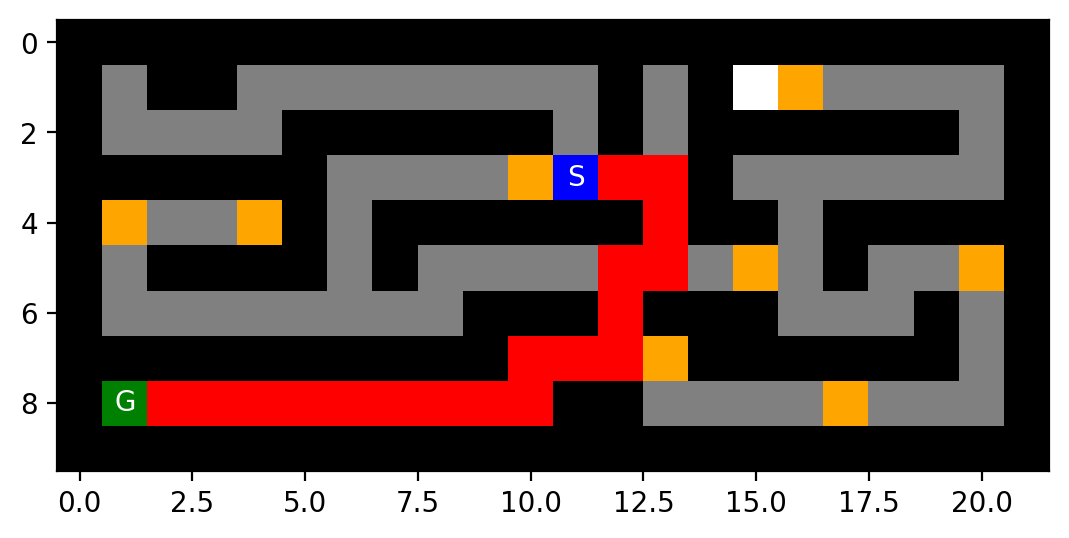

dfs:  solution :Node - pos = (8, 1); action = left; cost = 19, nodes expanded: 120, max depth: 18, max mem:10, max frontier:11


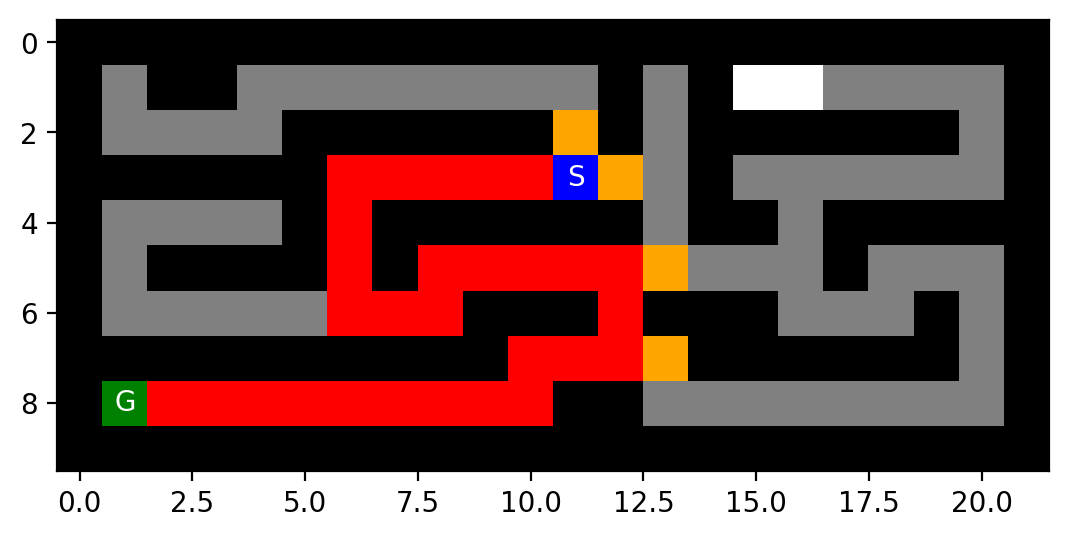

greedy:  solution :Node - pos = (8, 1); action = left; cost = 29, nodes expanded: 39, max depth: 29, max mem:48, max frontier:5


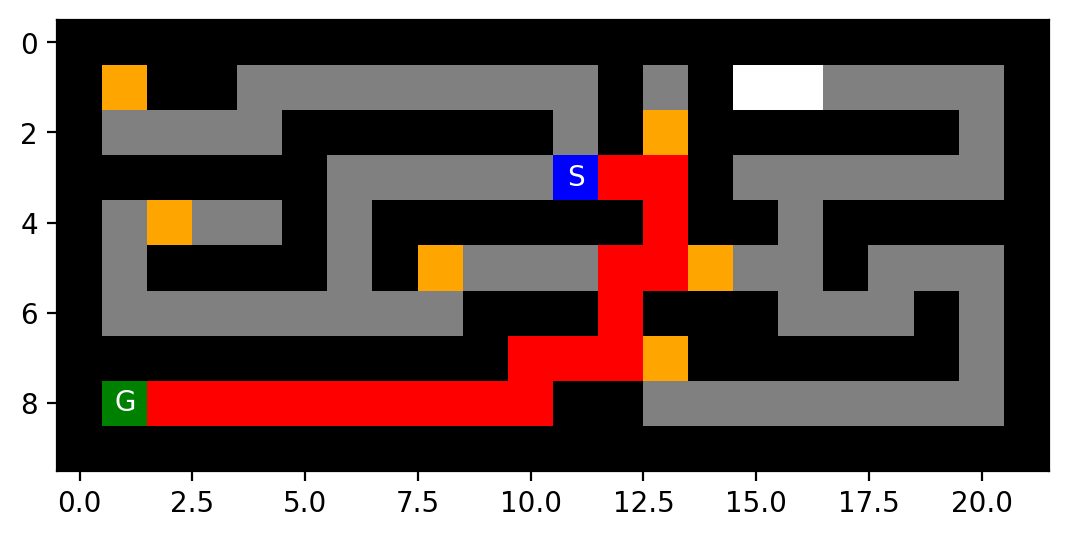

astar:  solution :Node - pos = (8, 1); action = left; cost = 19, nodes expanded: 52, max depth: 19, max mem:65, max frontier:8
--------------------------------
Empty Maze : 



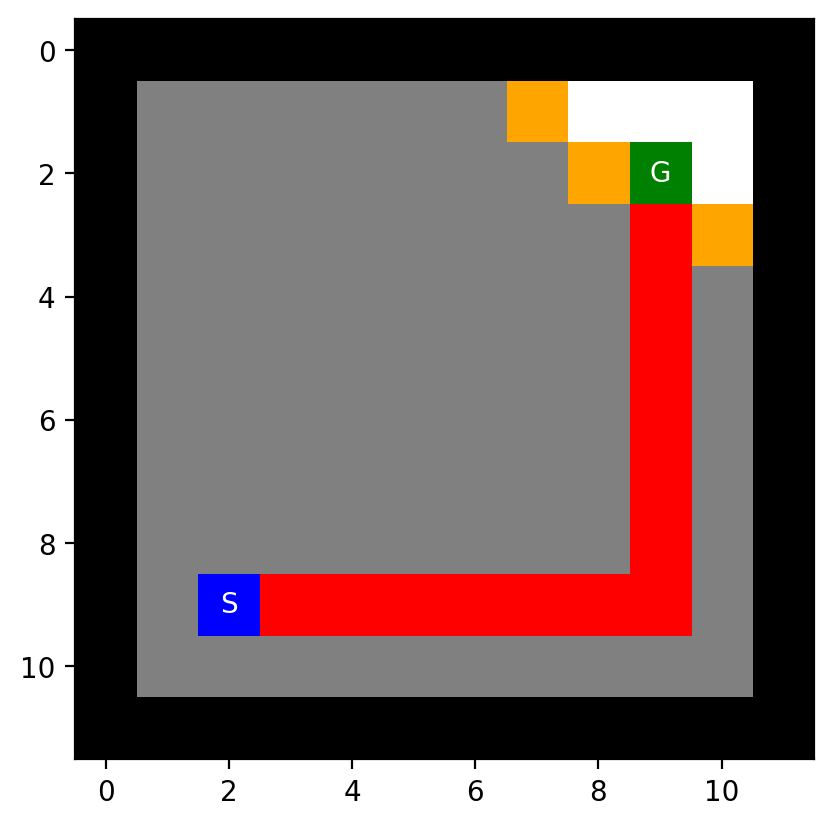

bfs:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 92, max depth: 13, max mem:98, max frontier:12


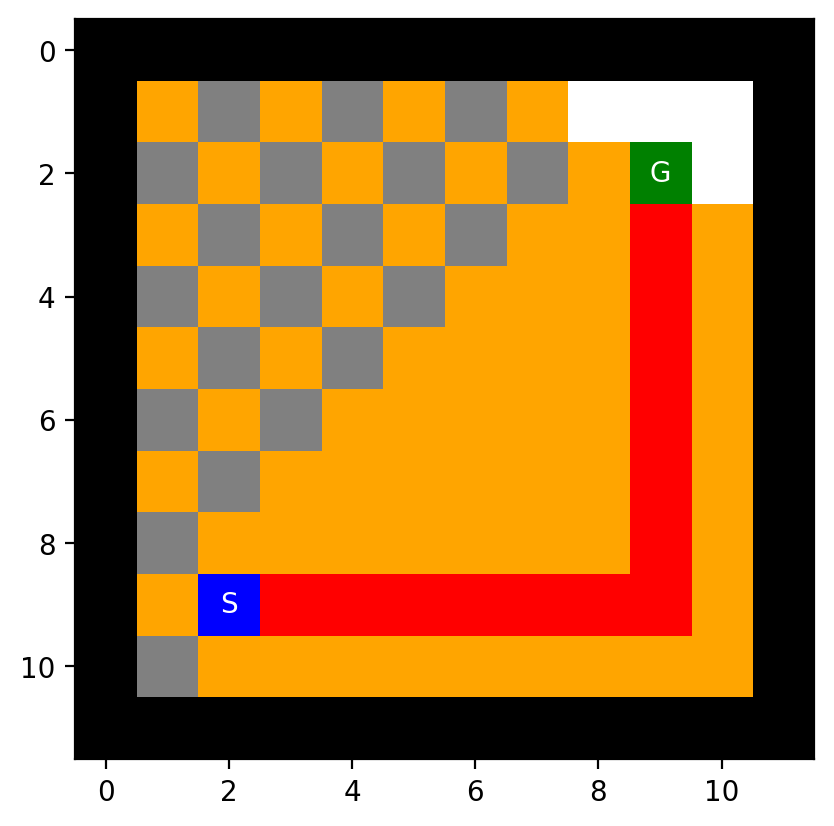

dfs:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 123127, max depth: 13, max mem:184076, max frontier:184078


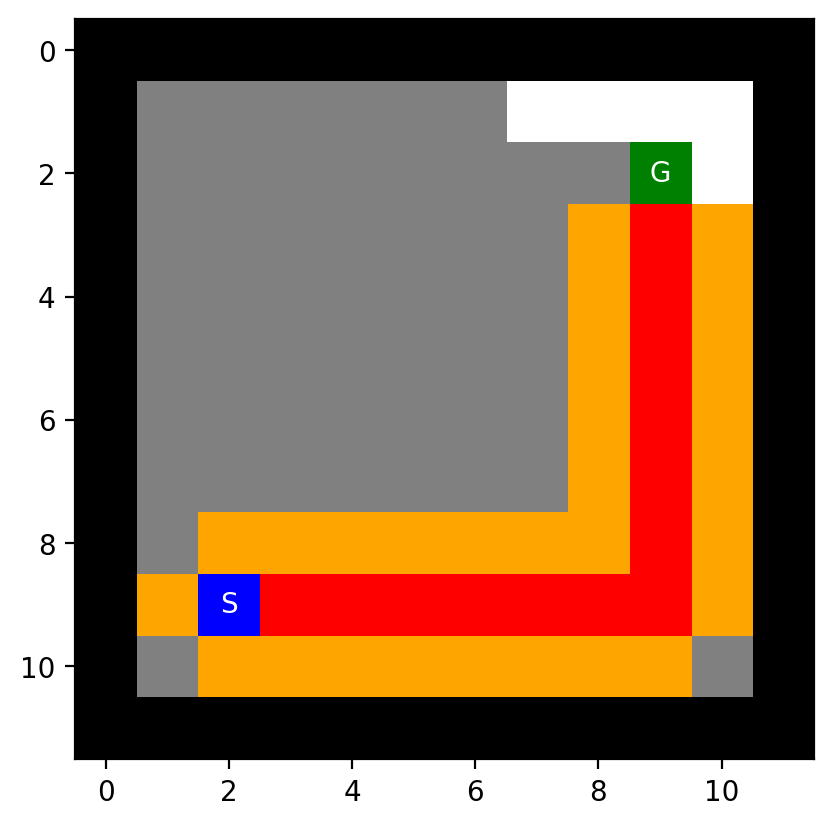

greedy:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 14, max depth: 14, max mem:71, max frontier:29


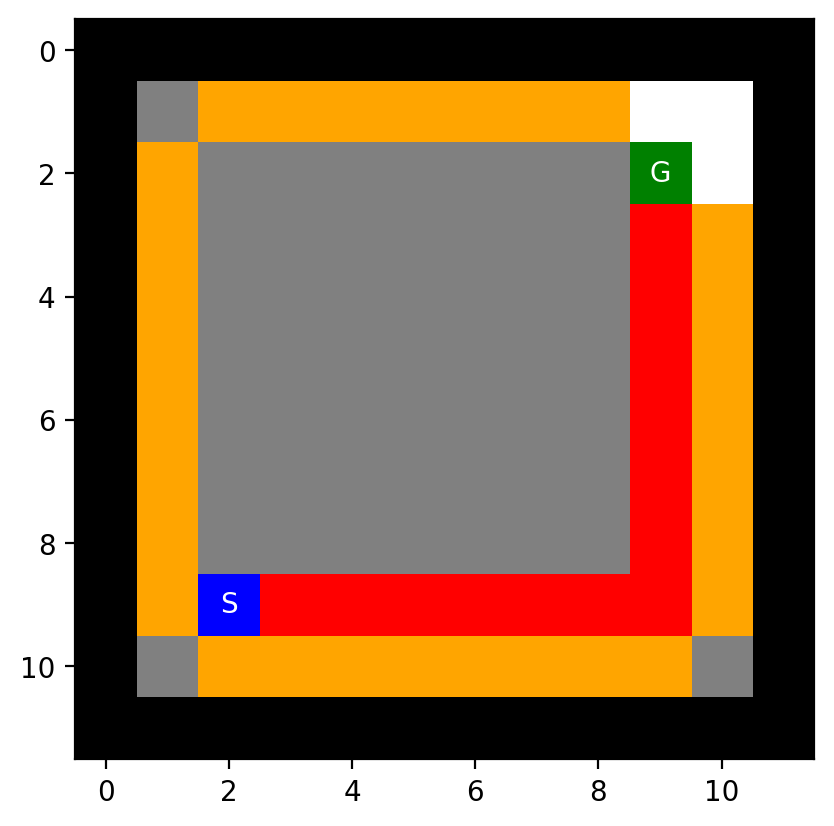

astar:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 63, max depth: 14, max mem:124, max frontier:31
--------------------------------
Empty Maze 2 : 



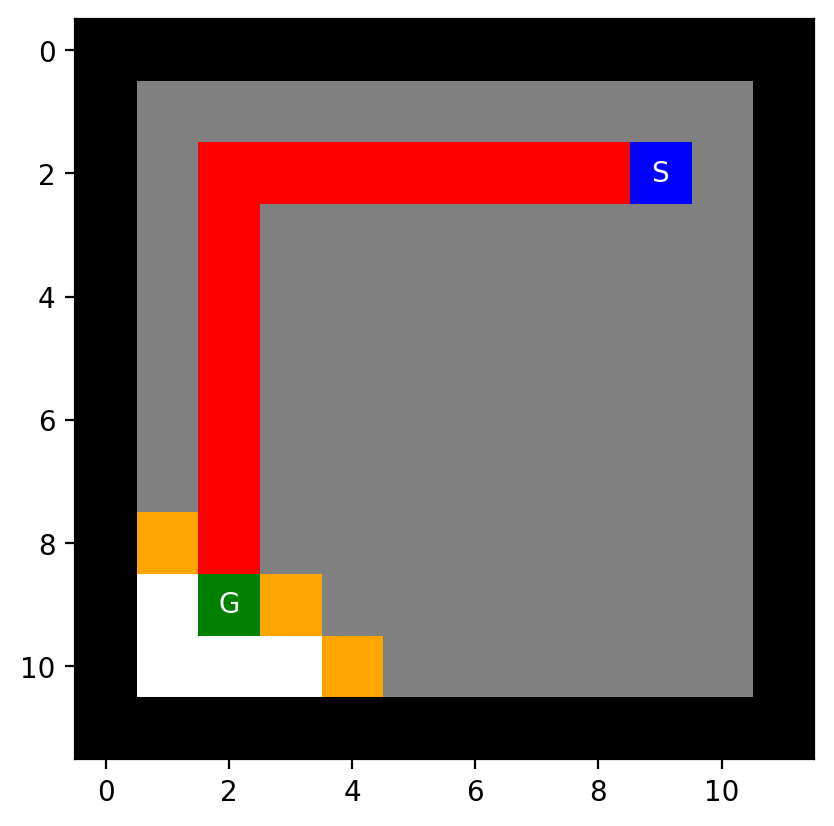

bfs:  solution :Node - pos = (9, 2); action = down; cost = 14, nodes expanded: 92, max depth: 13, max mem:98, max frontier:12


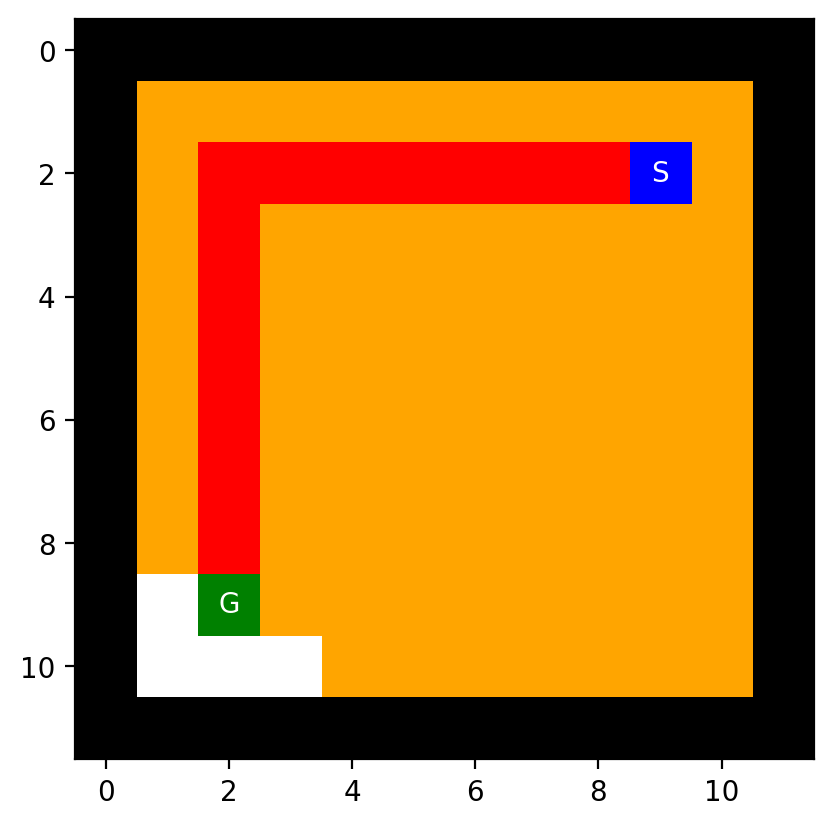

dfs:  solution :Node - pos = (9, 2); action = down; cost = 14, nodes expanded: 144807, max depth: 13, max mem:216108, max frontier:216110


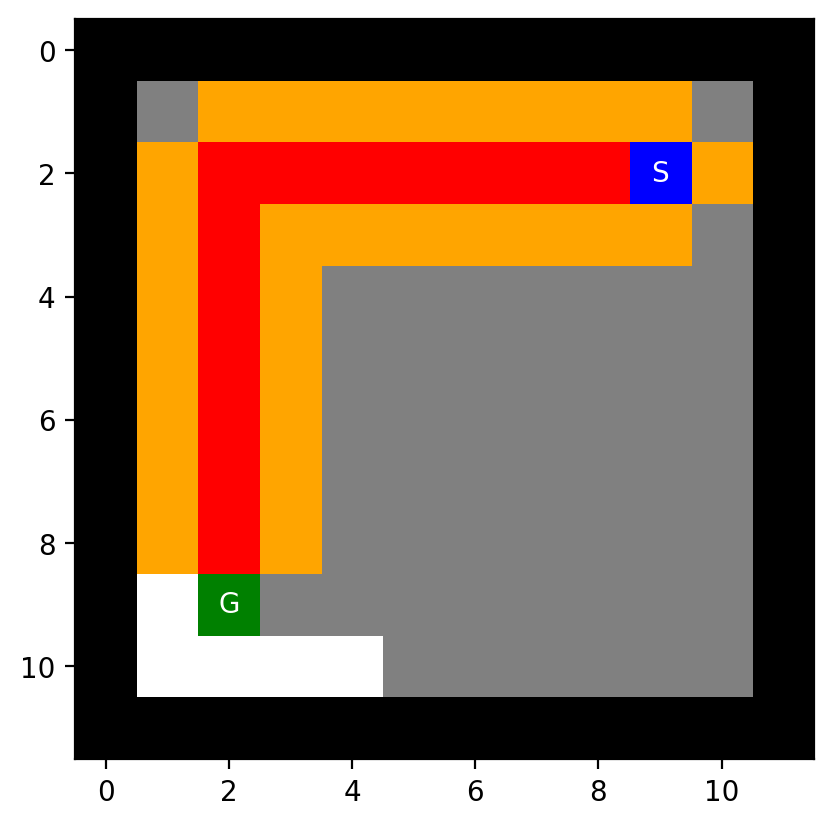

greedy:  solution :Node - pos = (9, 2); action = down; cost = 14, nodes expanded: 14, max depth: 14, max mem:71, max frontier:29


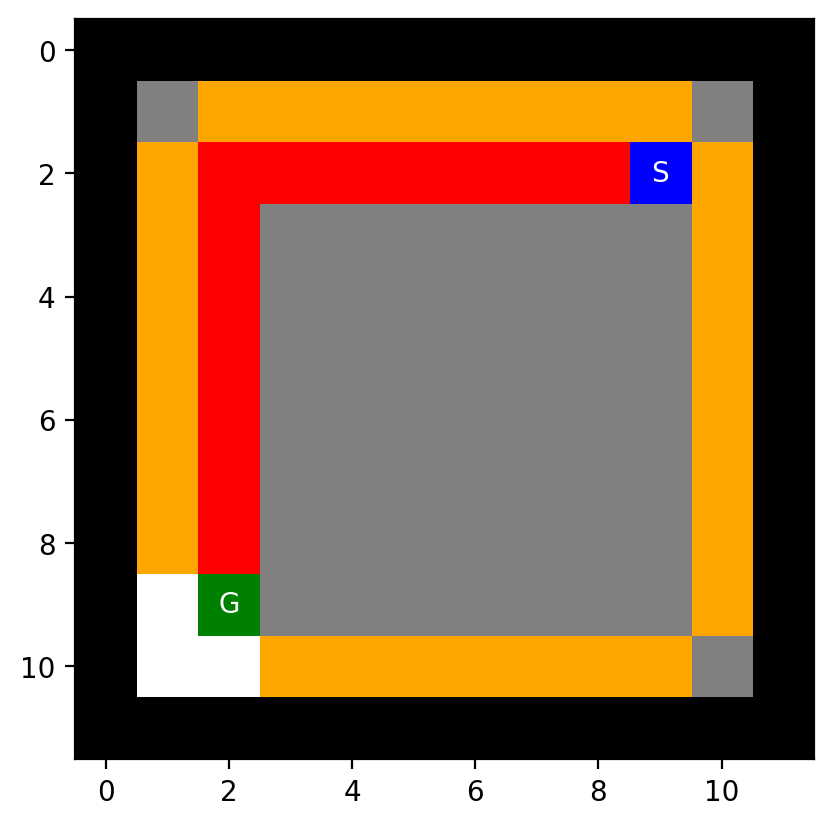

astar:  solution :Node - pos = (9, 2); action = down; cost = 14, nodes expanded: 63, max depth: 14, max mem:124, max frontier:31
--------------------------------
L Maze : 



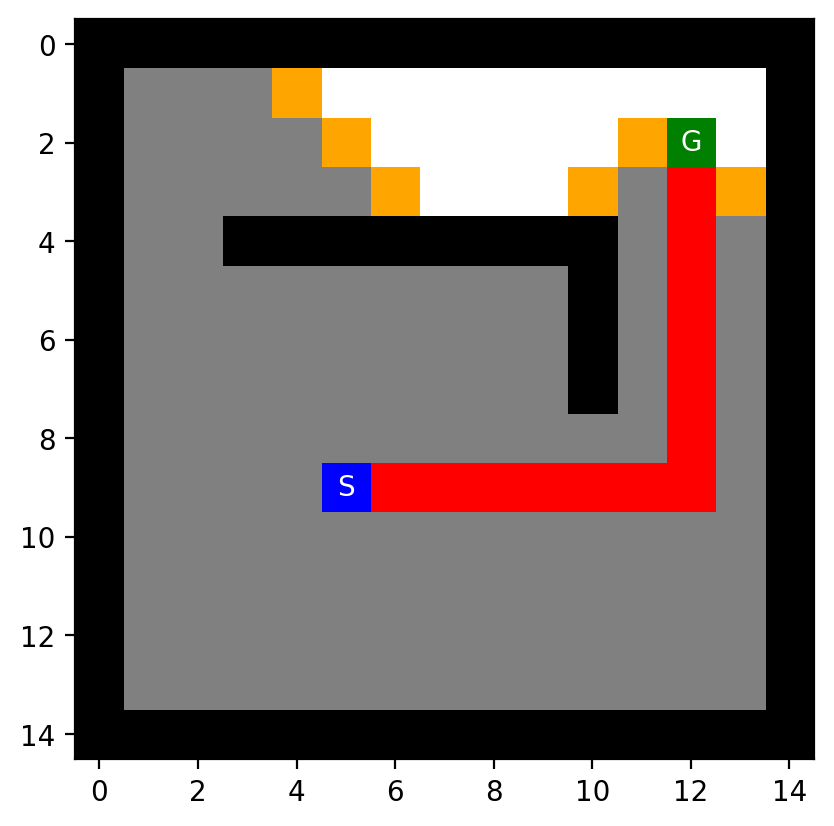

bfs:  solution :Node - pos = (2, 12); action = up; cost = 14, nodes expanded: 133, max depth: 13, max mem:145, max frontier:19


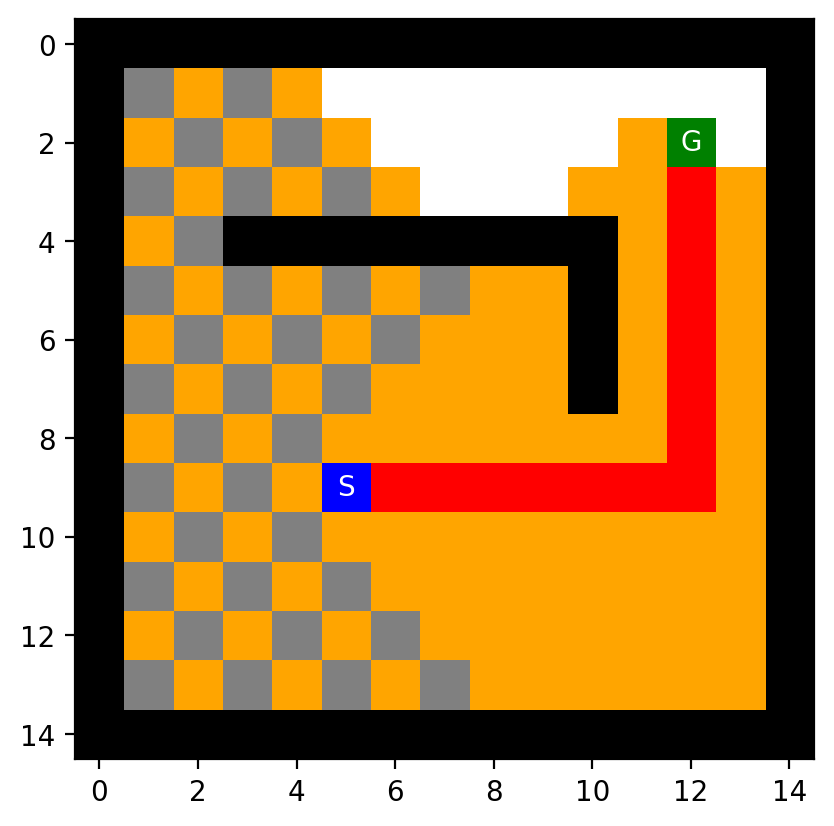

dfs:  solution :Node - pos = (2, 12); action = up; cost = 14, nodes expanded: 233293, max depth: 13, max mem:302050, max frontier:302052


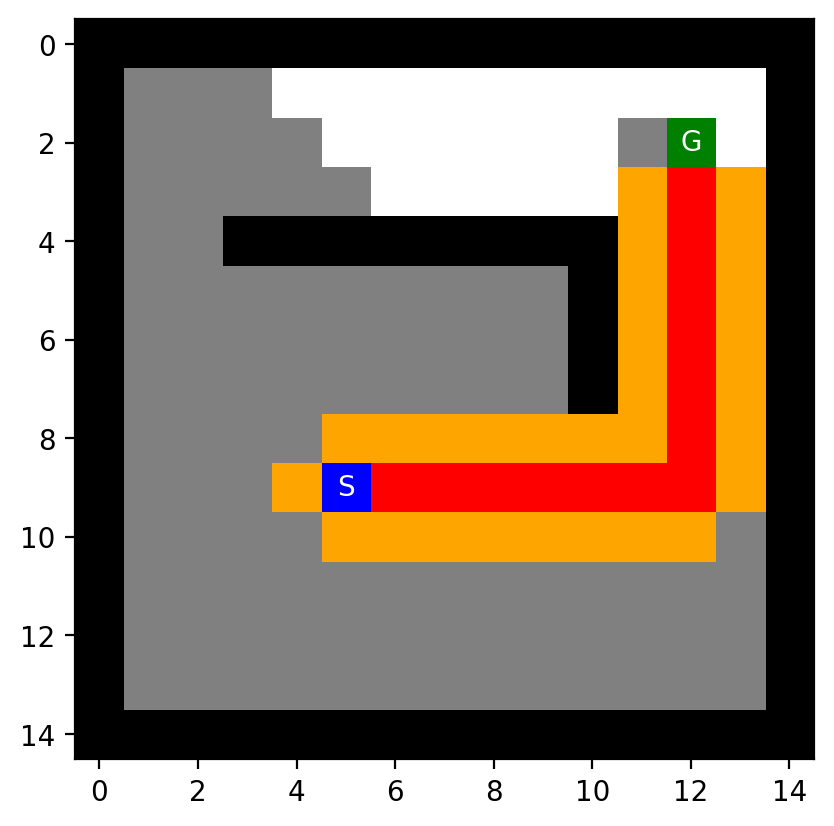

greedy:  solution :Node - pos = (2, 12); action = up; cost = 14, nodes expanded: 14, max depth: 14, max mem:71, max frontier:29


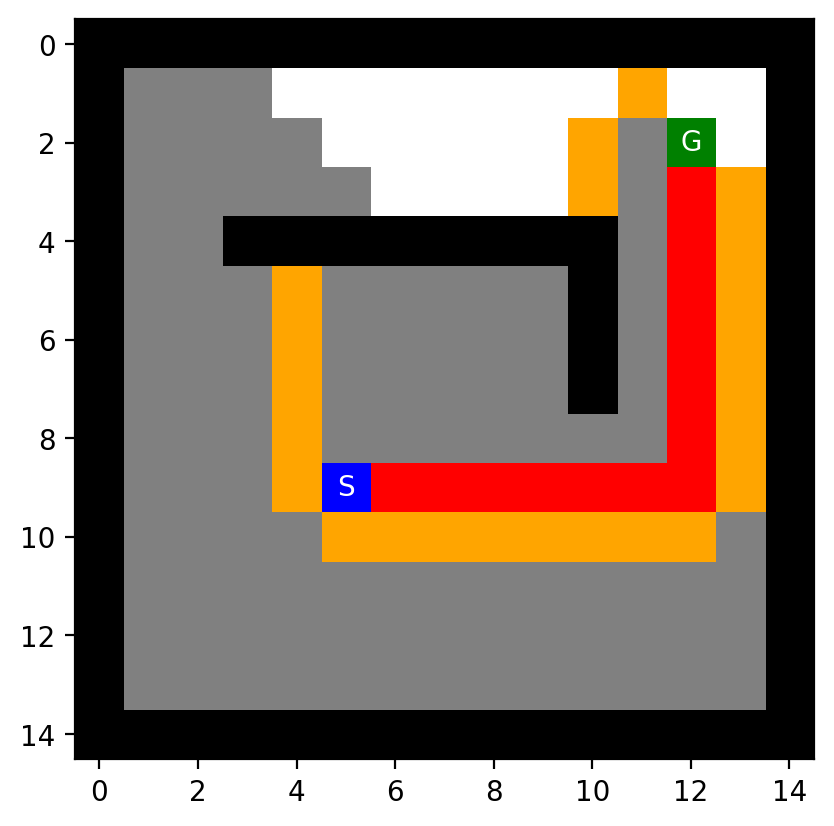

astar:  solution :Node - pos = (2, 12); action = up; cost = 14, nodes expanded: 42, max depth: 14, max mem:89, max frontier:24
--------------------------------
Large Maze : 



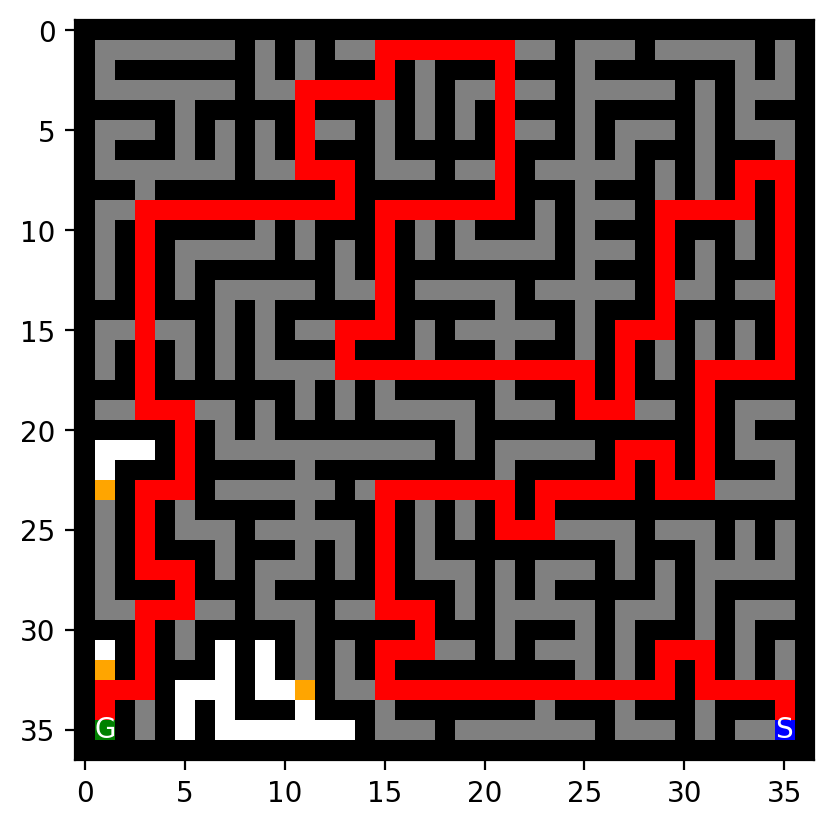

bfs:  solution :Node - pos = (35, 1); action = down; cost = 210, nodes expanded: 618, max depth: 209, max mem:624, max frontier:8


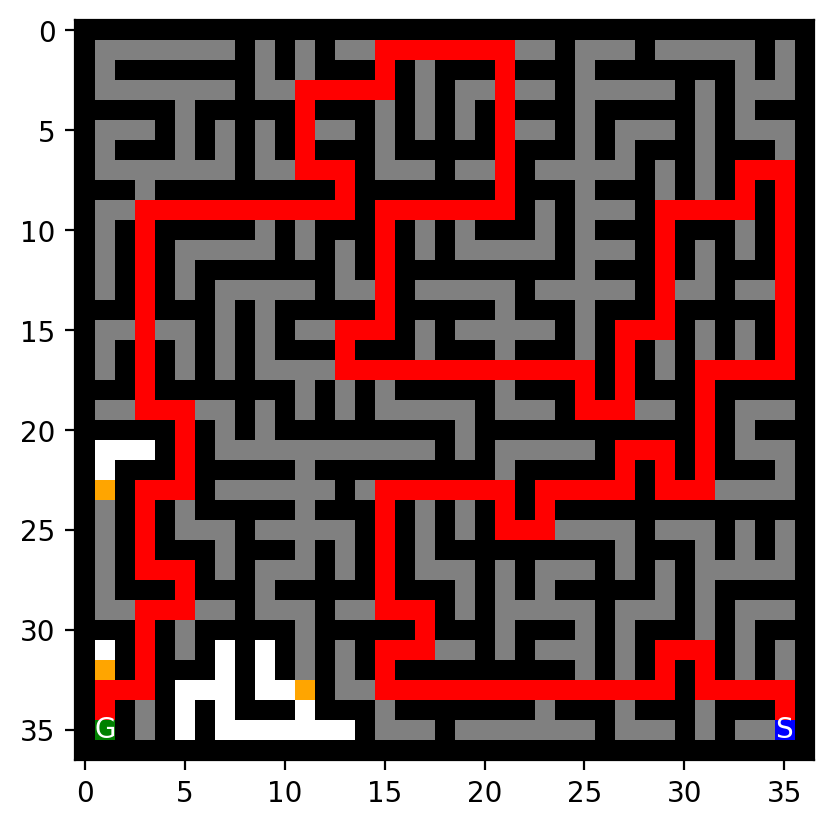

dfs:  solution :Node - pos = (35, 1); action = down; cost = 210, nodes expanded: 618, max depth: 209, max mem:7, max frontier:8


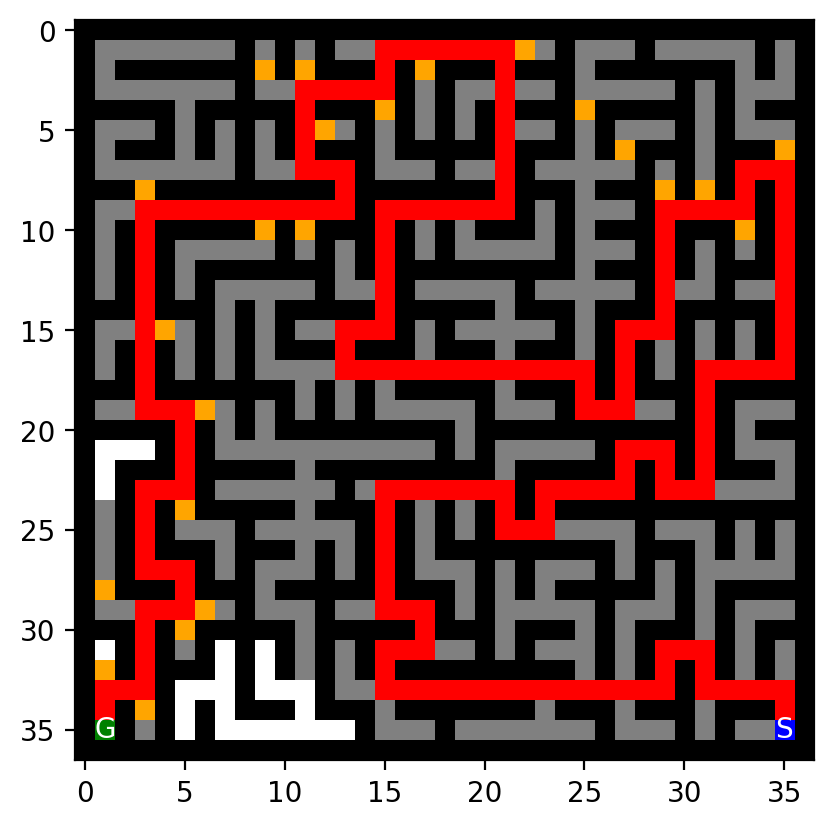

greedy:  solution :Node - pos = (35, 1); action = down; cost = 210, nodes expanded: 455, max depth: 210, max mem:502, max frontier:24


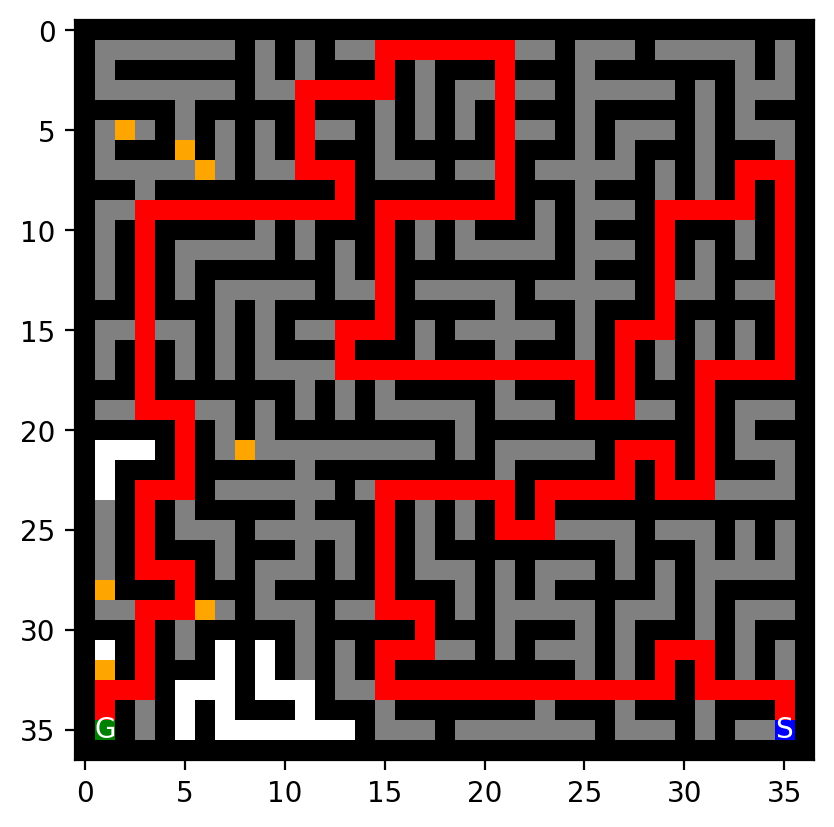

astar:  solution :Node - pos = (35, 1); action = down; cost = 210, nodes expanded: 549, max depth: 210, max mem:564, max frontier:12
--------------------------------
Loops Maze : 



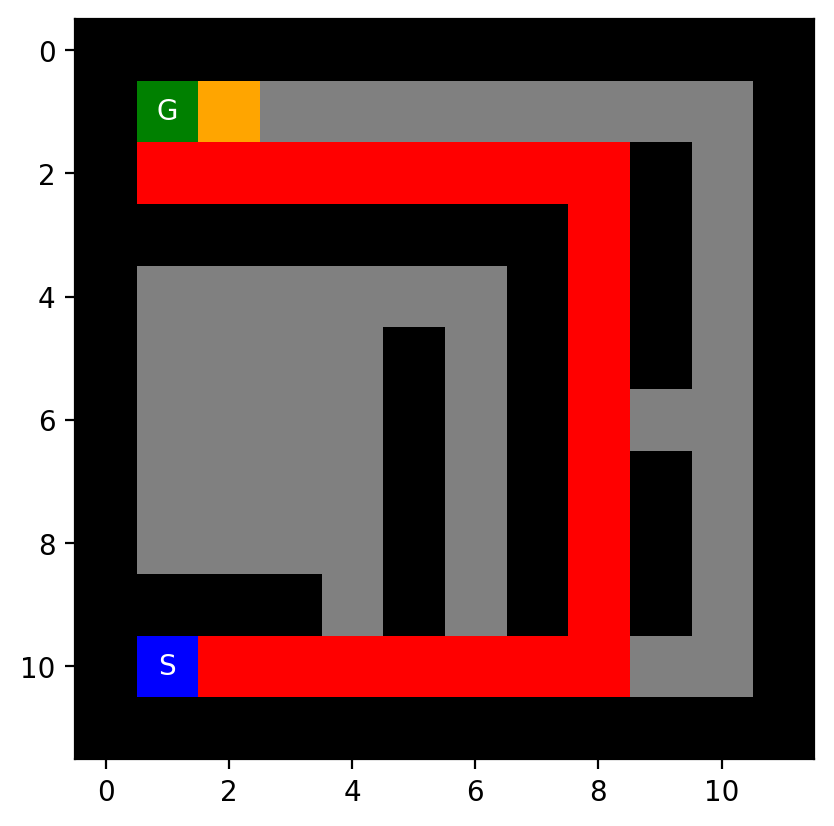

bfs:  solution :Node - pos = (1, 1); action = up; cost = 23, nodes expanded: 70, max depth: 22, max mem:73, max frontier:7


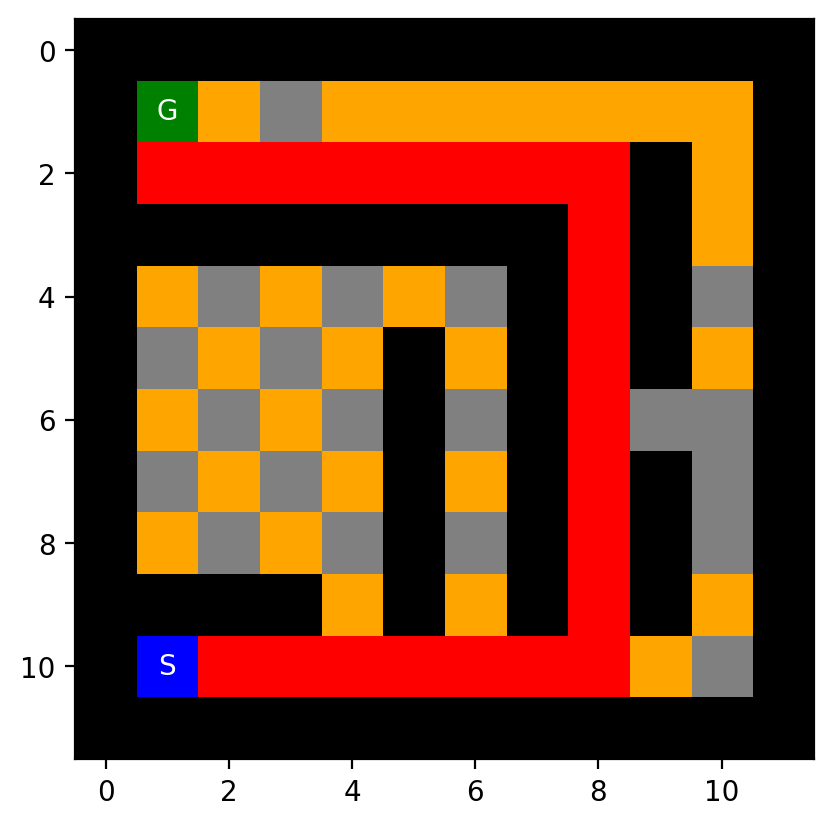

dfs:  solution :Node - pos = (1, 1); action = up; cost = 23, nodes expanded: 15559, max depth: 22, max mem:3037, max frontier:3038


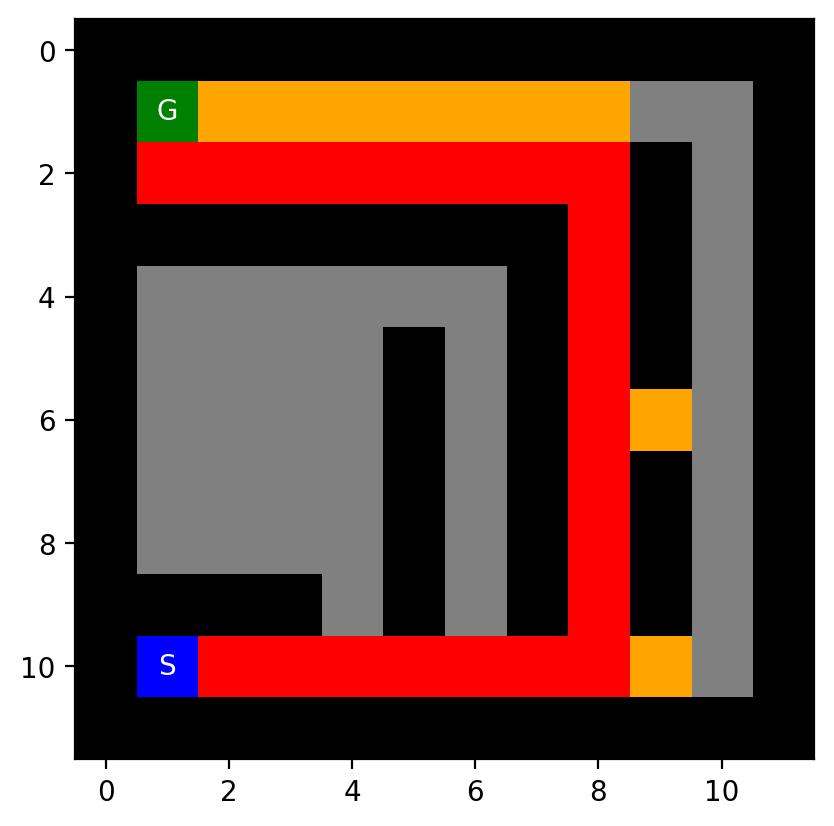

greedy:  solution :Node - pos = (1, 1); action = up; cost = 23, nodes expanded: 51, max depth: 23, max mem:70, max frontier:10


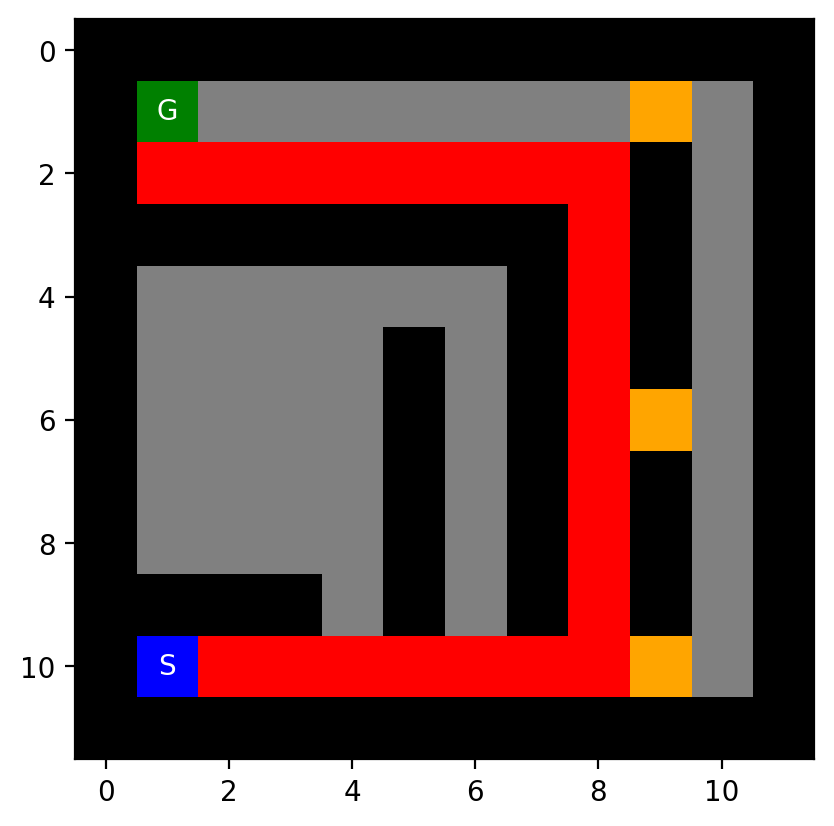

astar:  solution :Node - pos = (1, 1); action = up; cost = 23, nodes expanded: 58, max depth: 23, max mem:66, max frontier:6
--------------------------------
Medium Maze : 



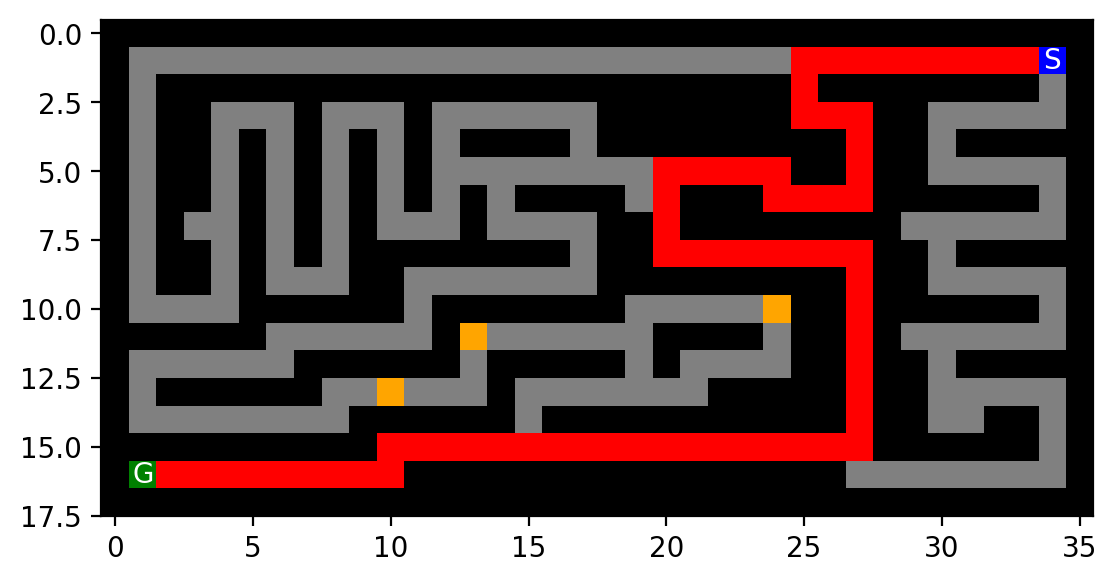

bfs:  solution :Node - pos = (16, 1); action = left; cost = 68, nodes expanded: 266, max depth: 67, max mem:272, max frontier:8


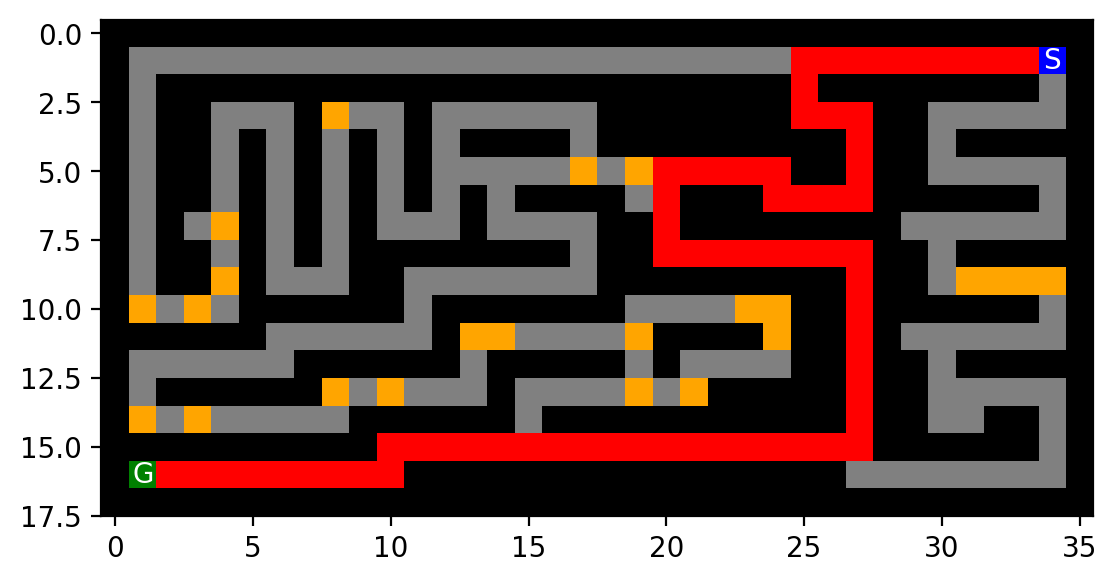

dfs:  solution :Node - pos = (16, 1); action = left; cost = 68, nodes expanded: 773, max depth: 67, max mem:33, max frontier:34


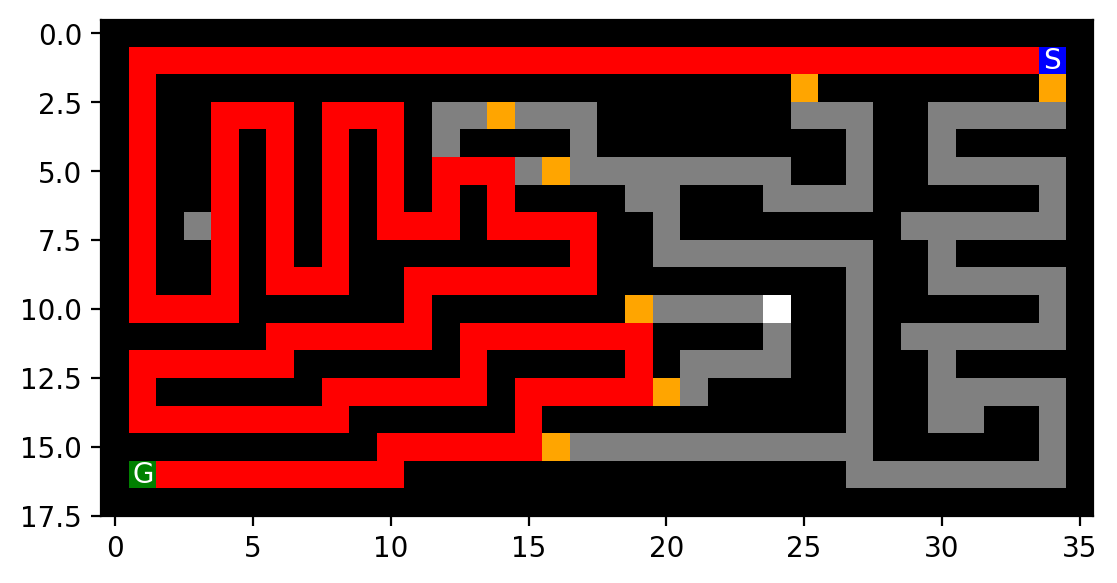

greedy:  solution :Node - pos = (16, 1); action = left; cost = 152, nodes expanded: 157, max depth: 152, max mem:172, max frontier:8


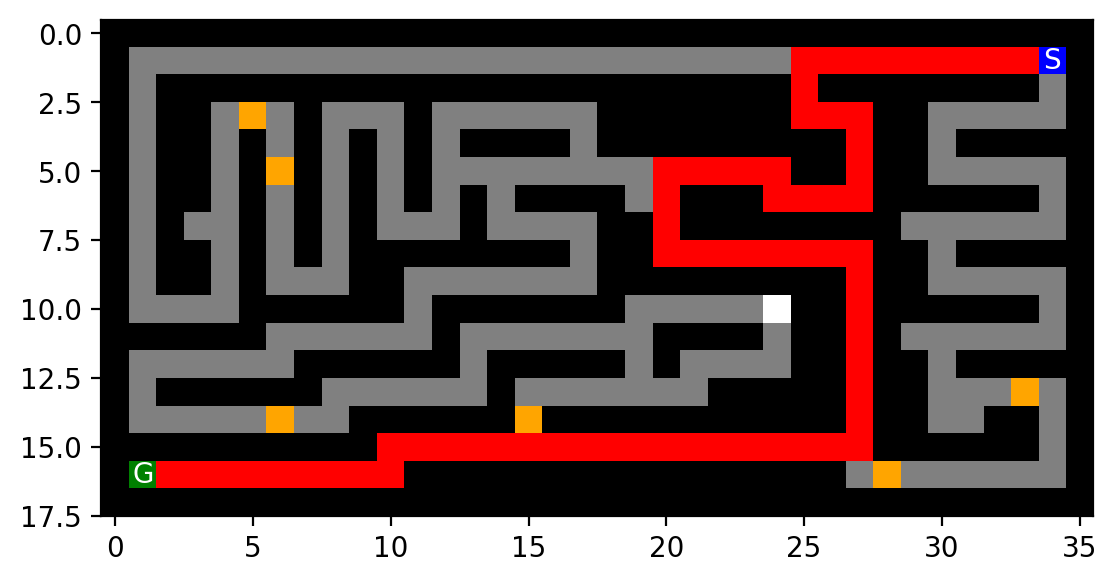

astar:  solution :Node - pos = (16, 1); action = left; cost = 68, nodes expanded: 221, max depth: 68, max mem:234, max frontier:8
--------------------------------
Open Maze : 



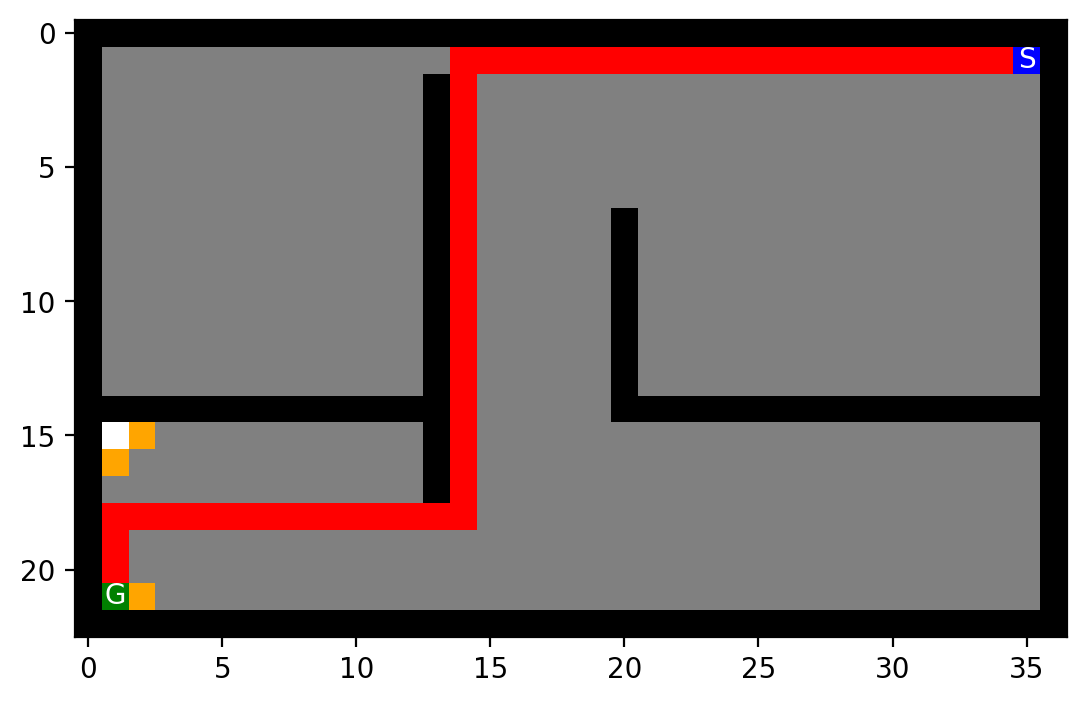

bfs:  solution :Node - pos = (21, 1); action = down; cost = 54, nodes expanded: 679, max depth: 53, max mem:688, max frontier:23
Unable to find dfs for this maze


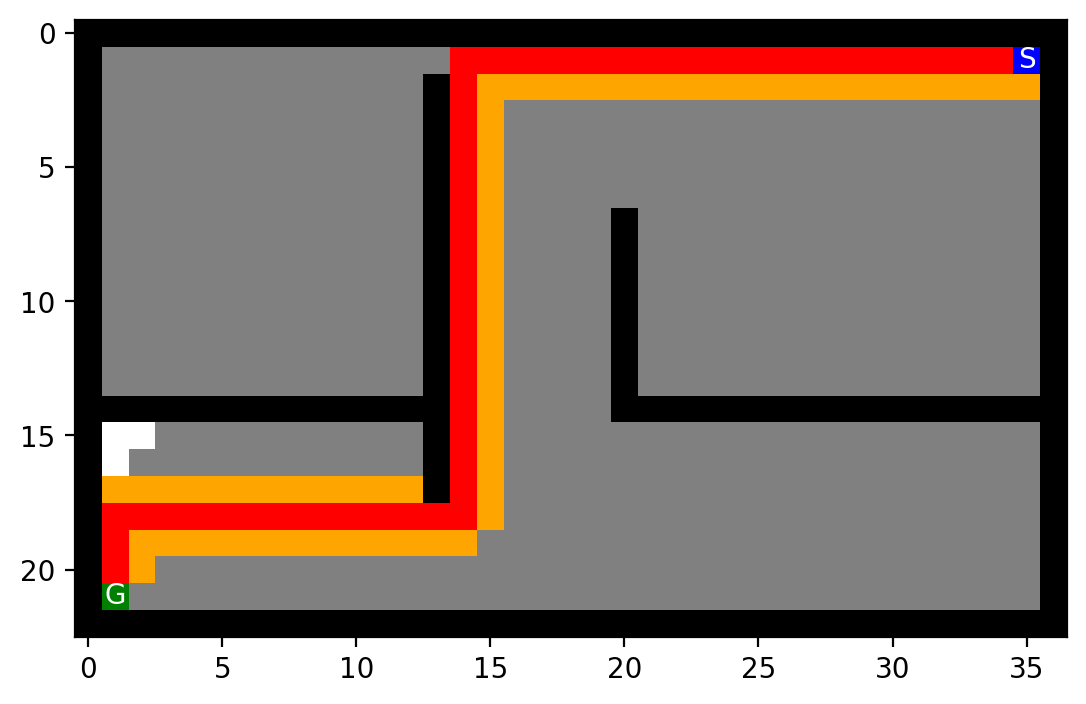

greedy:  solution :Node - pos = (21, 1); action = down; cost = 54, nodes expanded: 211, max depth: 57, max mem:338, max frontier:64


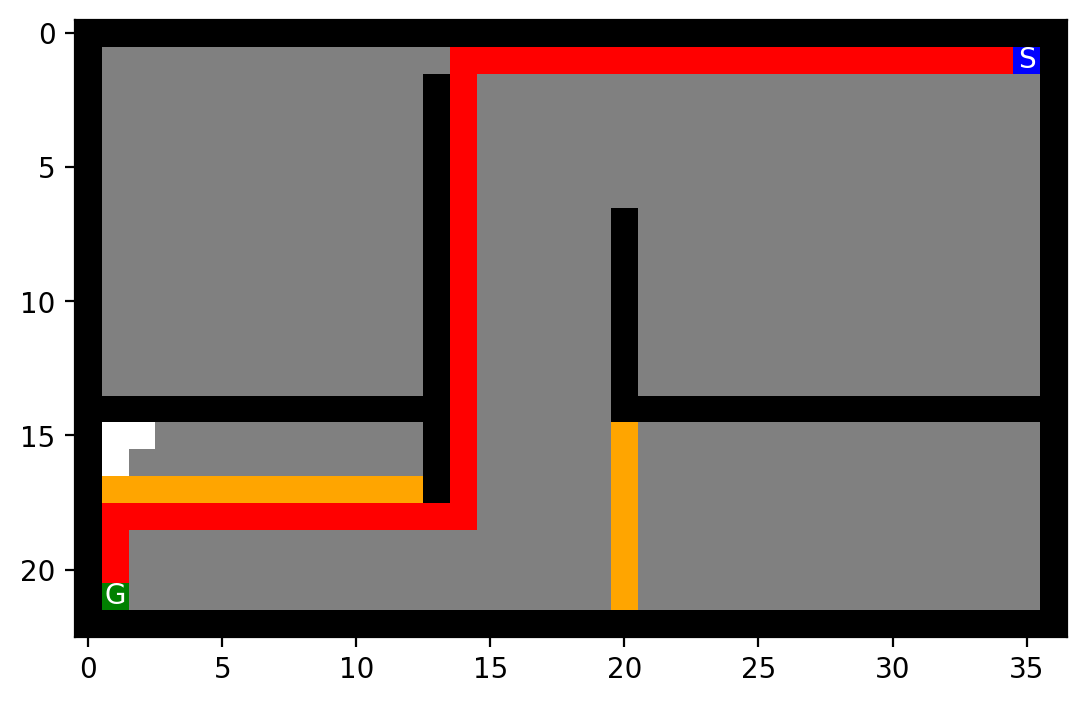

astar:  solution :Node - pos = (21, 1); action = down; cost = 54, nodes expanded: 535, max depth: 54, max mem:575, max frontier:23
--------------------------------
Wall Maze : 



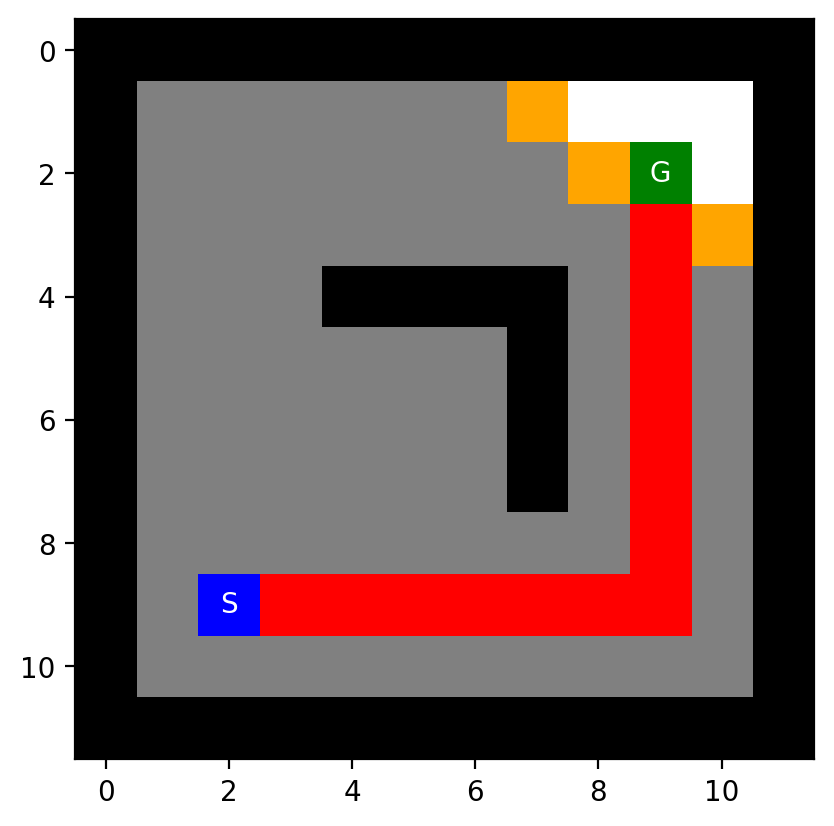

bfs:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 85, max depth: 13, max mem:91, max frontier:11


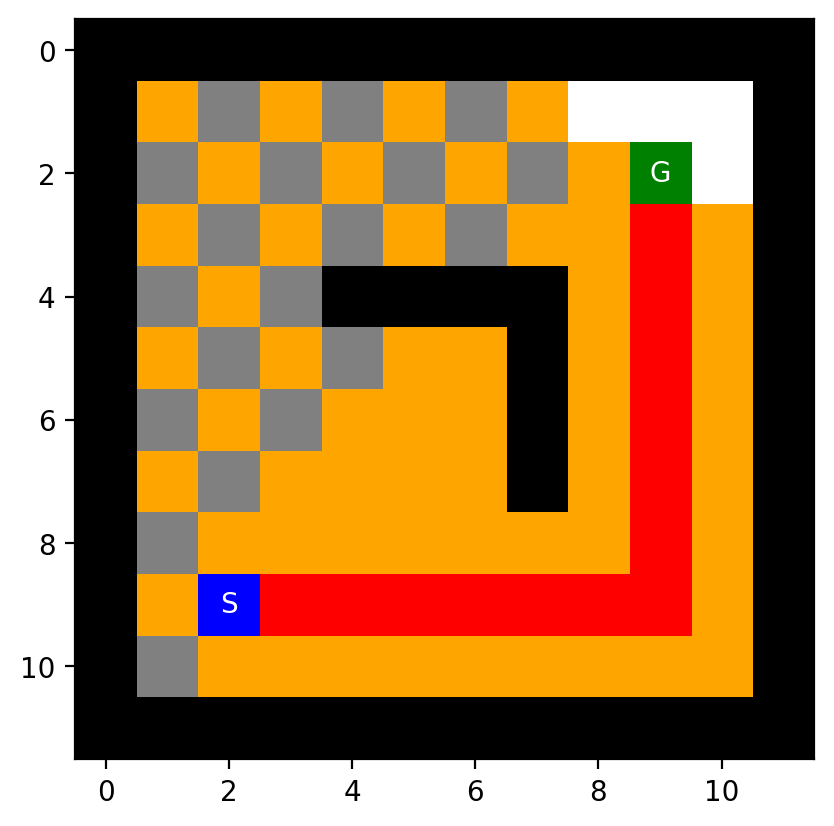

dfs:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 68367, max depth: 13, max mem:75004, max frontier:75006


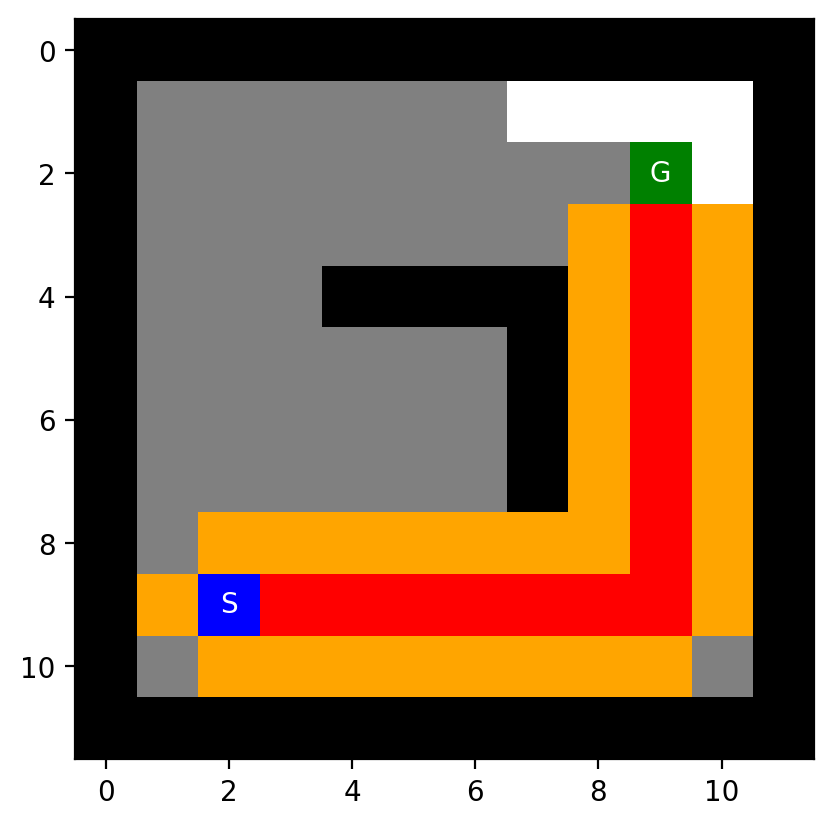

greedy:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 14, max depth: 14, max mem:71, max frontier:29


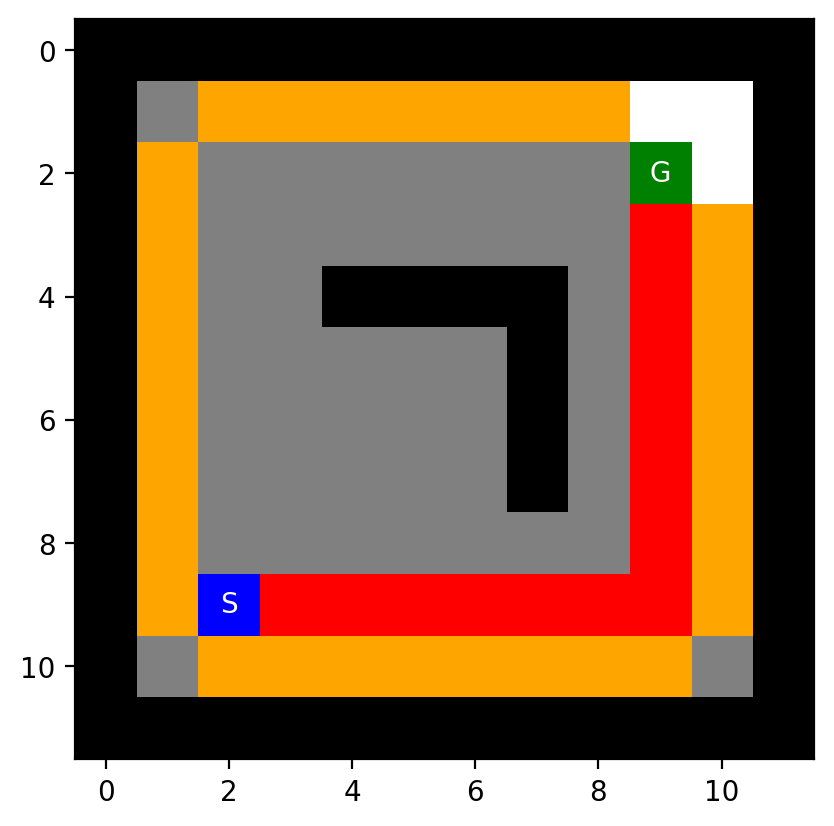

astar:  solution :Node - pos = (2, 9); action = up; cost = 14, nodes expanded: 56, max depth: 14, max mem:117, max frontier:31
--------------------------------


In [35]:
#For each maze contruct a table
#New Print?
results = {}

for i, nameMaze in enumerate(mazeList): #Printing out maze
    name = nameMaze[0]
    maze = nameMaze[1]
    print(name, ": \n")
    results[name] = {}

    initial = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")

    mazeCopy = maze.copy() #Print bfs use maze copy
    problem = Problem(initial, goal, mazeCopy)
    bfs_sol = breadth_first(problem)
    results[name]['bfs'] = bfs_sol
    bfs = bfs_sol.solution
    mh.show_maze(mazeCopy)
    print("bfs: ", bfs_sol.__str__())

    if name == "Open Maze":
        print("Unable to find dfs for this maze")
    else:
        mazeCopy = maze.copy() #Print dfs use maze copy
        problem = Problem(initial, goal, mazeCopy)
        dfs_sol = depth_first(problem)
        results[name]['dfs'] = dfs_sol
        dfs = dfs_sol.solution
        mh.show_maze(mazeCopy)
        print("dfs: ", dfs_sol.__str__())

    mazeCopy = maze.copy() #Print greedy use maze copy
    problem = Problem(initial, goal, mazeCopy)
    greedy_sol = greedy_best_fs(problem)
    results[name]['greedy'] = greedy_sol
    greedy = greedy_sol.solution
    mh.show_maze(mazeCopy)
    print("greedy: ", greedy_sol.__str__())

    mazeCopy = maze.copy() #Print astar use maze copy
    problem = Problem(initial, goal, mazeCopy)
    astar_sol = aStar(problem)
    results[name]['astar'] = astar_sol
    astar = astar_sol.solution
    mh.show_maze(mazeCopy)
    print("astar: ", astar_sol.__str__())

    print('--------------------------------')

    

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |       19    |        90        |         18       |      94         |         9          |
| DFS       |    19       |        120        |        18        |     10          |        11           |
| GBS       |    29      |        39        |        29        |     48          |        5           |
| A*        |    19       |        52        |         19       |      65         |         8          |




__Medium Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     68      |        266        |        67        |       272        |           8        |
| DFS       |     68      |         773       |      67          |      33         |          34         |
| GBS       |     152      |       157         |      152          |       172        |          8         |
| A*        |      68     |        221        |      68          |        234       |          8         |

---




__large Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     210      |         618       |       209         |      624         |       8            |
| DFS       |     210      |         618       |       209         |      7         |         8          |
| GBS       |     210      |        455        |        210        |       210        |         502          |
| A*        |     210      |         549       |       210         |       564        |         12          |


__Open Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     54      |      679          |        53        |         688      |          23         |
| DFS       |     N/A*      |        N/A*        |      N/A*         |      N/A*         |       N/A*            |
| GBS       |      54     |          211      |        57        |       338        |           64        |
| A*        |     54      |        535        |         54       |       575        |           23        |

DFS does not appear to work in this case because when run, it hangs for some time without finding a solution. This may be presumably because of the large amount of space, forcing the algorithm to explore each and every basic combination of possible paths from the start to the goal node, of which there may be a very large amount. Note that from testing this algorithm does not return a None object or error out meaning that it was still running when manually terminated.


__Wall Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     14     |         85       |         13       |       91        |         11          |
| DFS       |     14      |        68367        |       13         |      75004         |       75006            |
| GBS       |      14     |         14       |        14        |      71       |     29              |
| A*        |      14     |          56      |           14     |      117         |          31         |


__Loop Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    23       |       70         |         22       |      73         |          7         |
| DFS       |    23       |        15559        |      22          |     3037          |       3038            |
| GBS       |    23       |      51          |      23          |     70          |         10          |
| A*        |     23      |       58         |        23        |       66        |            6       |


__Empty Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    14       |        92        |        13       |        98       |           12        |
| DFS       |    14       |       123127         |      13          |     184076          |       184078            |
| GBS       |    14       |       14         |      14          |     71         |         29         |
| A*        |     14      |        63        |          14      |         124     |          31         |


__Empty_2 Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    14       |      92          |       13         |      98         |         12          |
| DFS       |     14      |        144807        |      13          |     216108          |        216110           |
| GBS       |     14      |        14        |        14        |         71      |          29         |
| A*        |     14      |       63         |        14        |      124         |           31        |

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

In [45]:
# Add charts
print(results)

bfsAverages = {'pathCost': [], 'numExpanded': [], 'maxTreeDepth': [], 'maxNodesInMem' : [], 'maxFrontierSize': []}

dfsAverages = {'pathCost': [], 'numExpanded': [], 'maxTreeDepth': [], 'maxNodesInMem' : [], 'maxFrontierSize': []}

greedyAverages = {'pathCost': [], 'numExpanded': [], 'maxTreeDepth': [], 'maxNodesInMem' : [], 'maxFrontierSize': []}

astarAverages = {'pathCost': [], 'numExpanded': [], 'maxTreeDepth': [], 'maxNodesInMem' : [], 'maxFrontierSize': []}

counter = 0
for name, maze in mazeList:
    counter +=1

    if 'bfs' in results[name]:
        bfsResults = results[name]['bfs']
        if bfsResults is not None: #bfs
            bfsAverages['pathCost'].append(bfsResults.solution.cost)
            bfsAverages['numExpanded'].append(bfsResults.nodes_expanded)
            bfsAverages['maxTreeDepth'].append(bfsResults.max_depth)
            bfsAverages['maxNodesInMem'].append(bfsResults.max_mem)
            bfsAverages['maxFrontierSize'].append(bfsResults.max_frontier)
    
    if 'dfs' in results[name]:
        dfsResults = results[name]['dfs']
        if dfsResults is not None: #dfs
            dfsAverages['pathCost'].append(dfsResults.solution.cost)
            dfsAverages['numExpanded'].append(dfsResults.nodes_expanded)
            dfsAverages['maxTreeDepth'].append(dfsResults.max_depth)
            dfsAverages['maxNodesInMem'].append(dfsResults.max_mem)
            dfsAverages['maxFrontierSize'].append(dfsResults.max_frontier)

    if 'greedy' in results[name]:
        greedyResults = results[name]['greedy']
        if greedyResults is not None: #greedy
            greedyAverages['pathCost'].append(greedyResults.solution.cost)
            greedyAverages['numExpanded'].append(greedyResults.nodes_expanded)
            greedyAverages['maxTreeDepth'].append(greedyResults.max_depth)
            greedyAverages['maxNodesInMem'].append(greedyResults.max_mem)
            greedyAverages['maxFrontierSize'].append(greedyResults.max_frontier)

    if 'astar' in results[name]:
        astarResult = results[name]['astar']
        if astarResult is not None: #astar
            astarAverages['pathCost'].append(astarResult.solution.cost)
            astarAverages['numExpanded'].append(astarResult.nodes_expanded)
            astarAverages['maxTreeDepth'].append(astarResult.max_depth)
            astarAverages['maxNodesInMem'].append(astarResult.max_mem)
            astarAverages['maxFrontierSize'].append(astarResult.max_frontier)



{'Small Maze': {'bfs': <__main__.Solution object at 0x000001AE5CD65430>, 'dfs': <__main__.Solution object at 0x000001AEAC081220>, 'greedy': <__main__.Solution object at 0x000001AEAC1C1580>, 'astar': <__main__.Solution object at 0x000001AE5E7B9C40>}, 'Empty Maze': {'bfs': <__main__.Solution object at 0x000001AEAC031DC0>, 'dfs': <__main__.Solution object at 0x000001AE6110BEF0>, 'greedy': <__main__.Solution object at 0x000001AEAC4E2120>, 'astar': <__main__.Solution object at 0x000001AE5CF0D430>}, 'Empty Maze 2': {'bfs': <__main__.Solution object at 0x000001AE5A8D0A40>, 'dfs': <__main__.Solution object at 0x000001AE5CE77290>, 'greedy': <__main__.Solution object at 0x000001AE6330AF90>, 'astar': <__main__.Solution object at 0x000001AE5CE5E6F0>}, 'L Maze': {'bfs': <__main__.Solution object at 0x000001AEAC1ED790>, 'dfs': <__main__.Solution object at 0x000001AE5F2A2C60>, 'greedy': <__main__.Solution object at 0x000001AE5A7C74D0>, 'astar': <__main__.Solution object at 0x000001AE5F67CE60>}, 'Larg

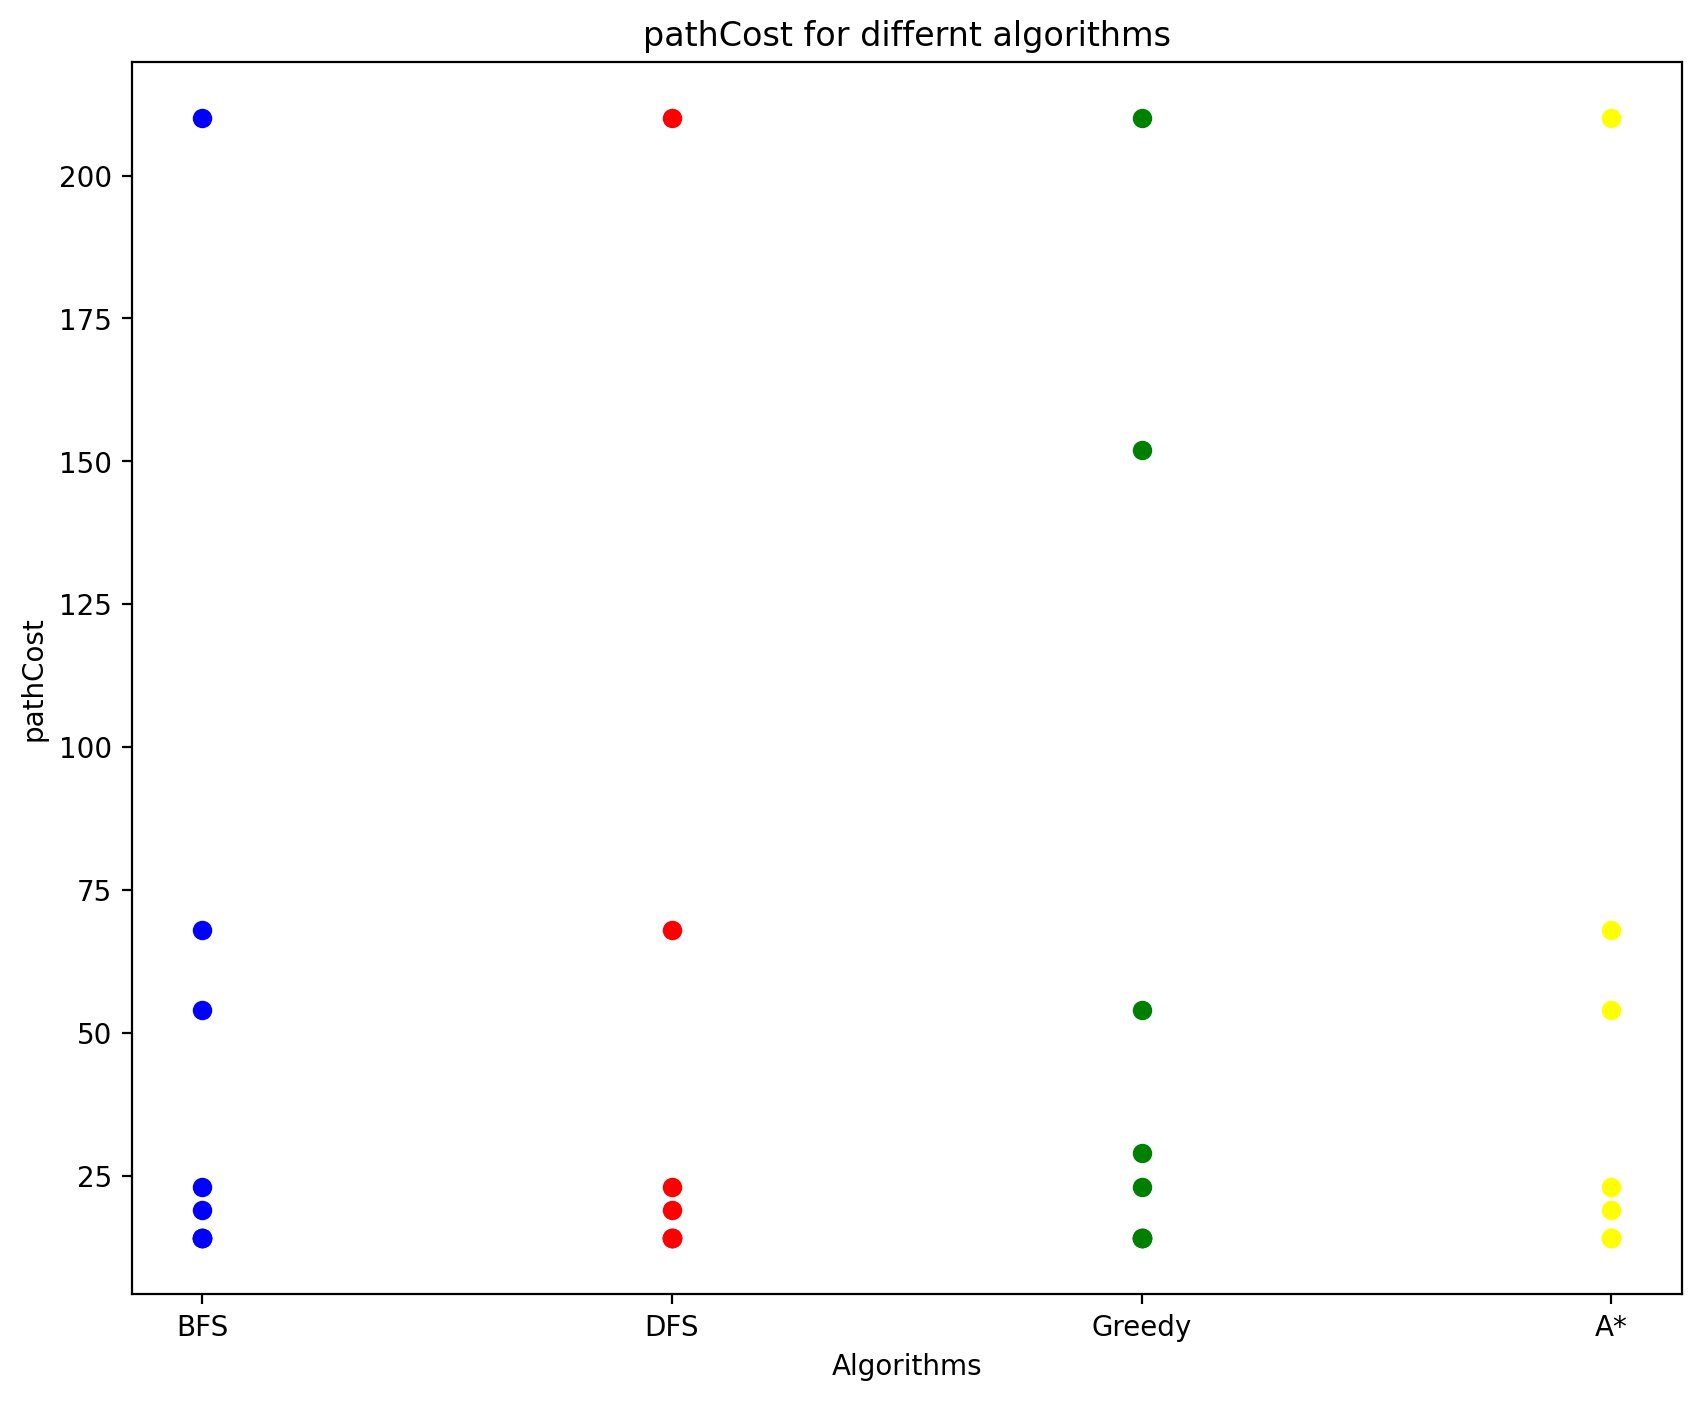

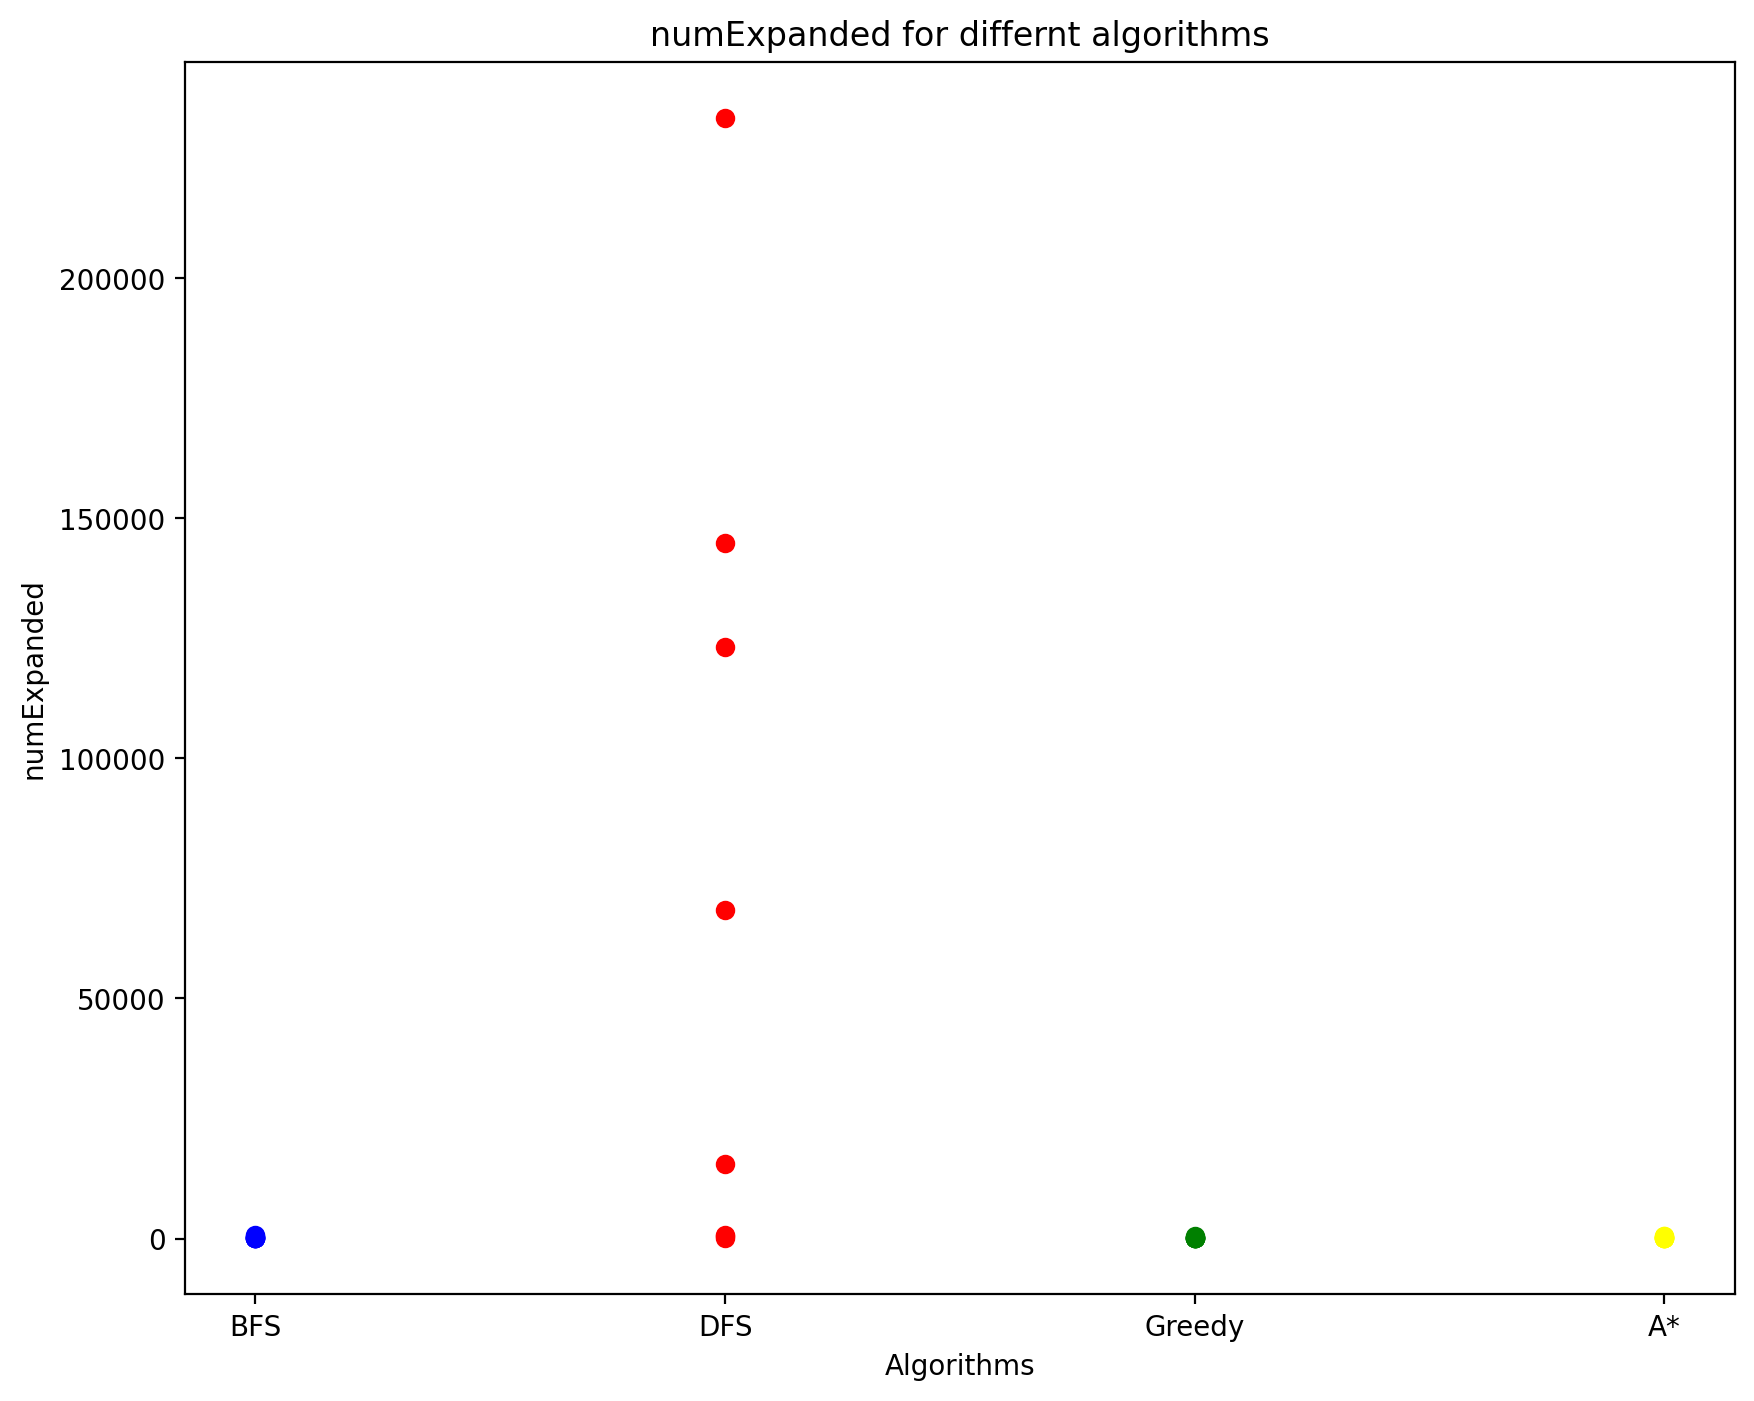

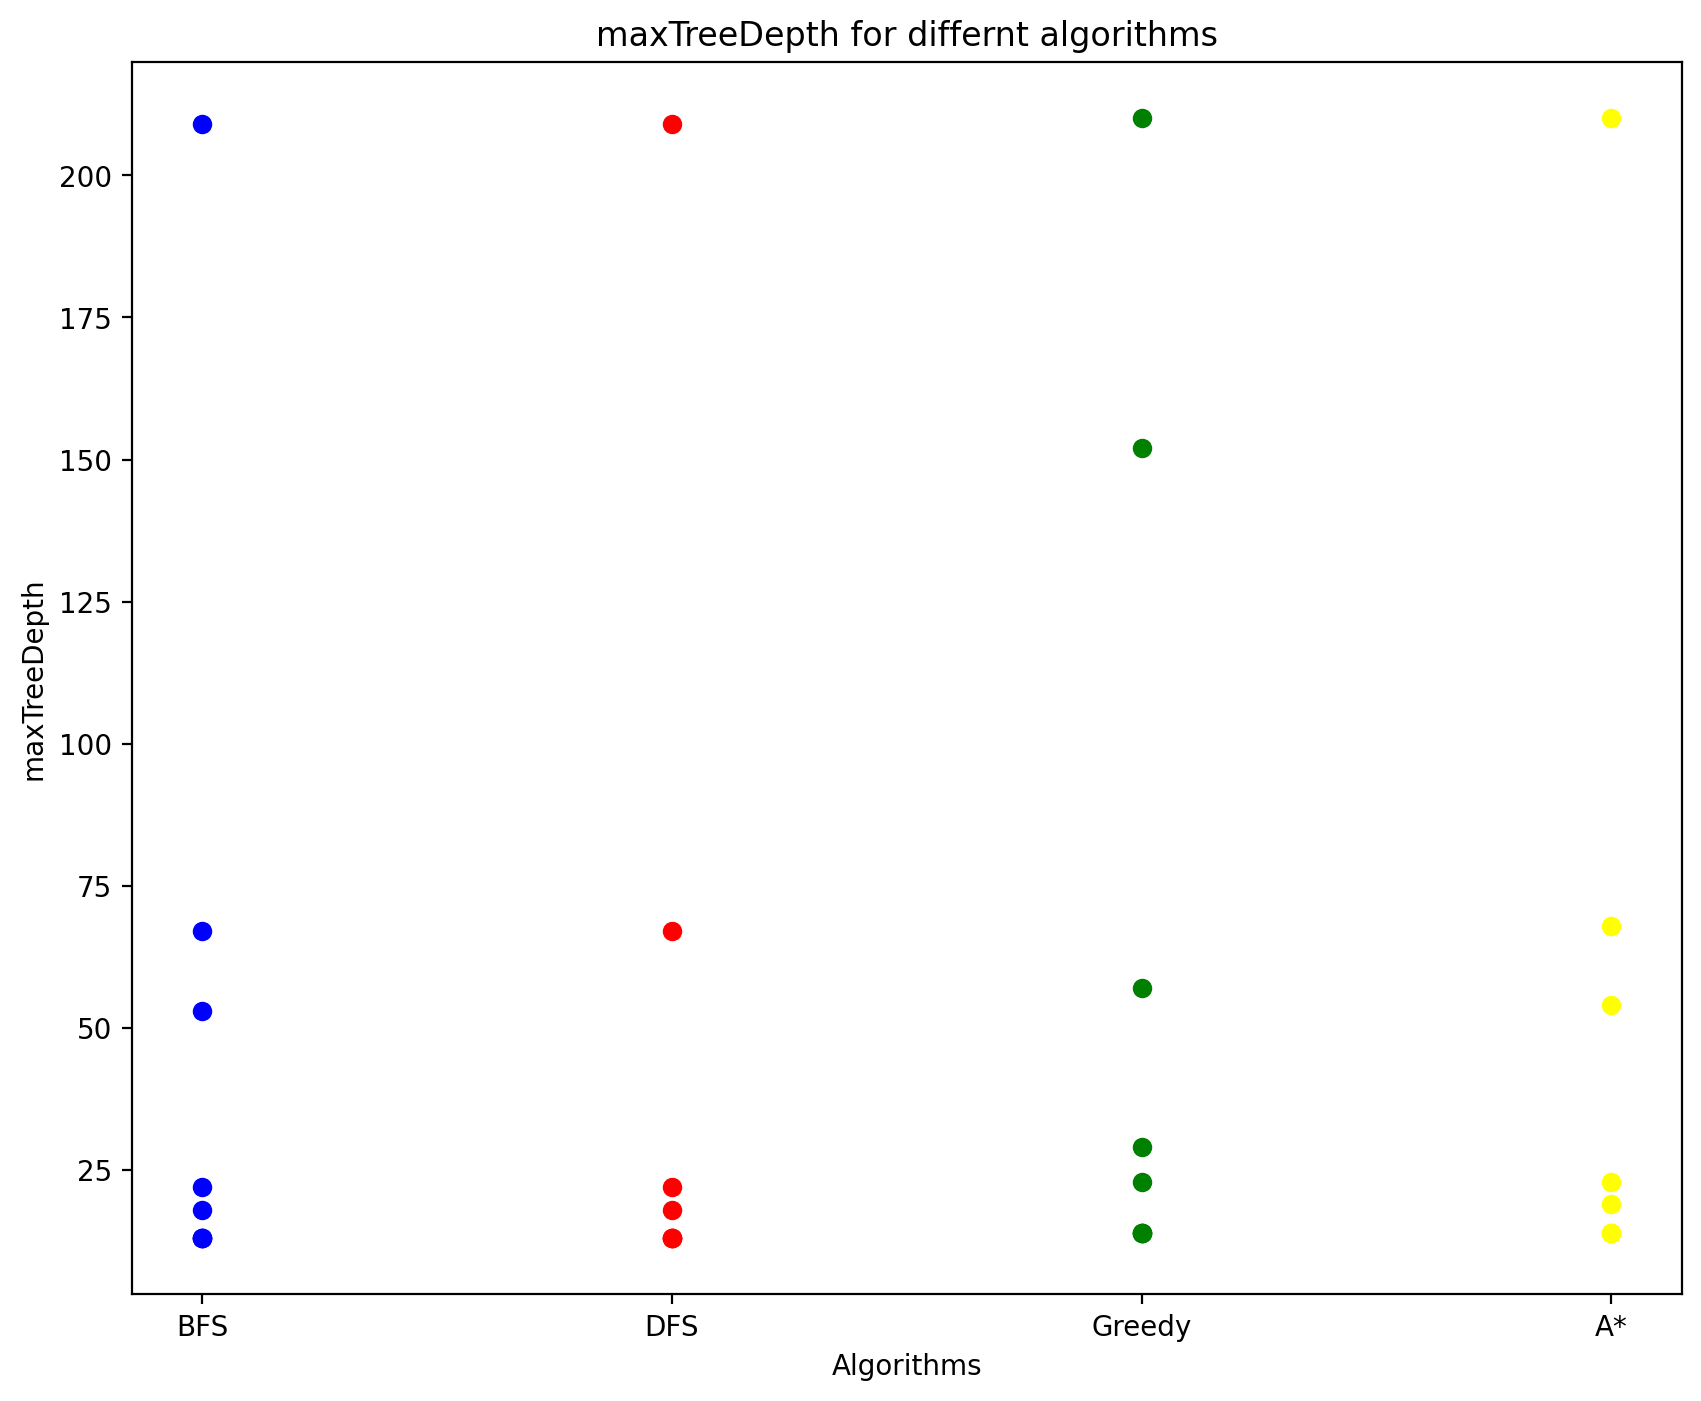

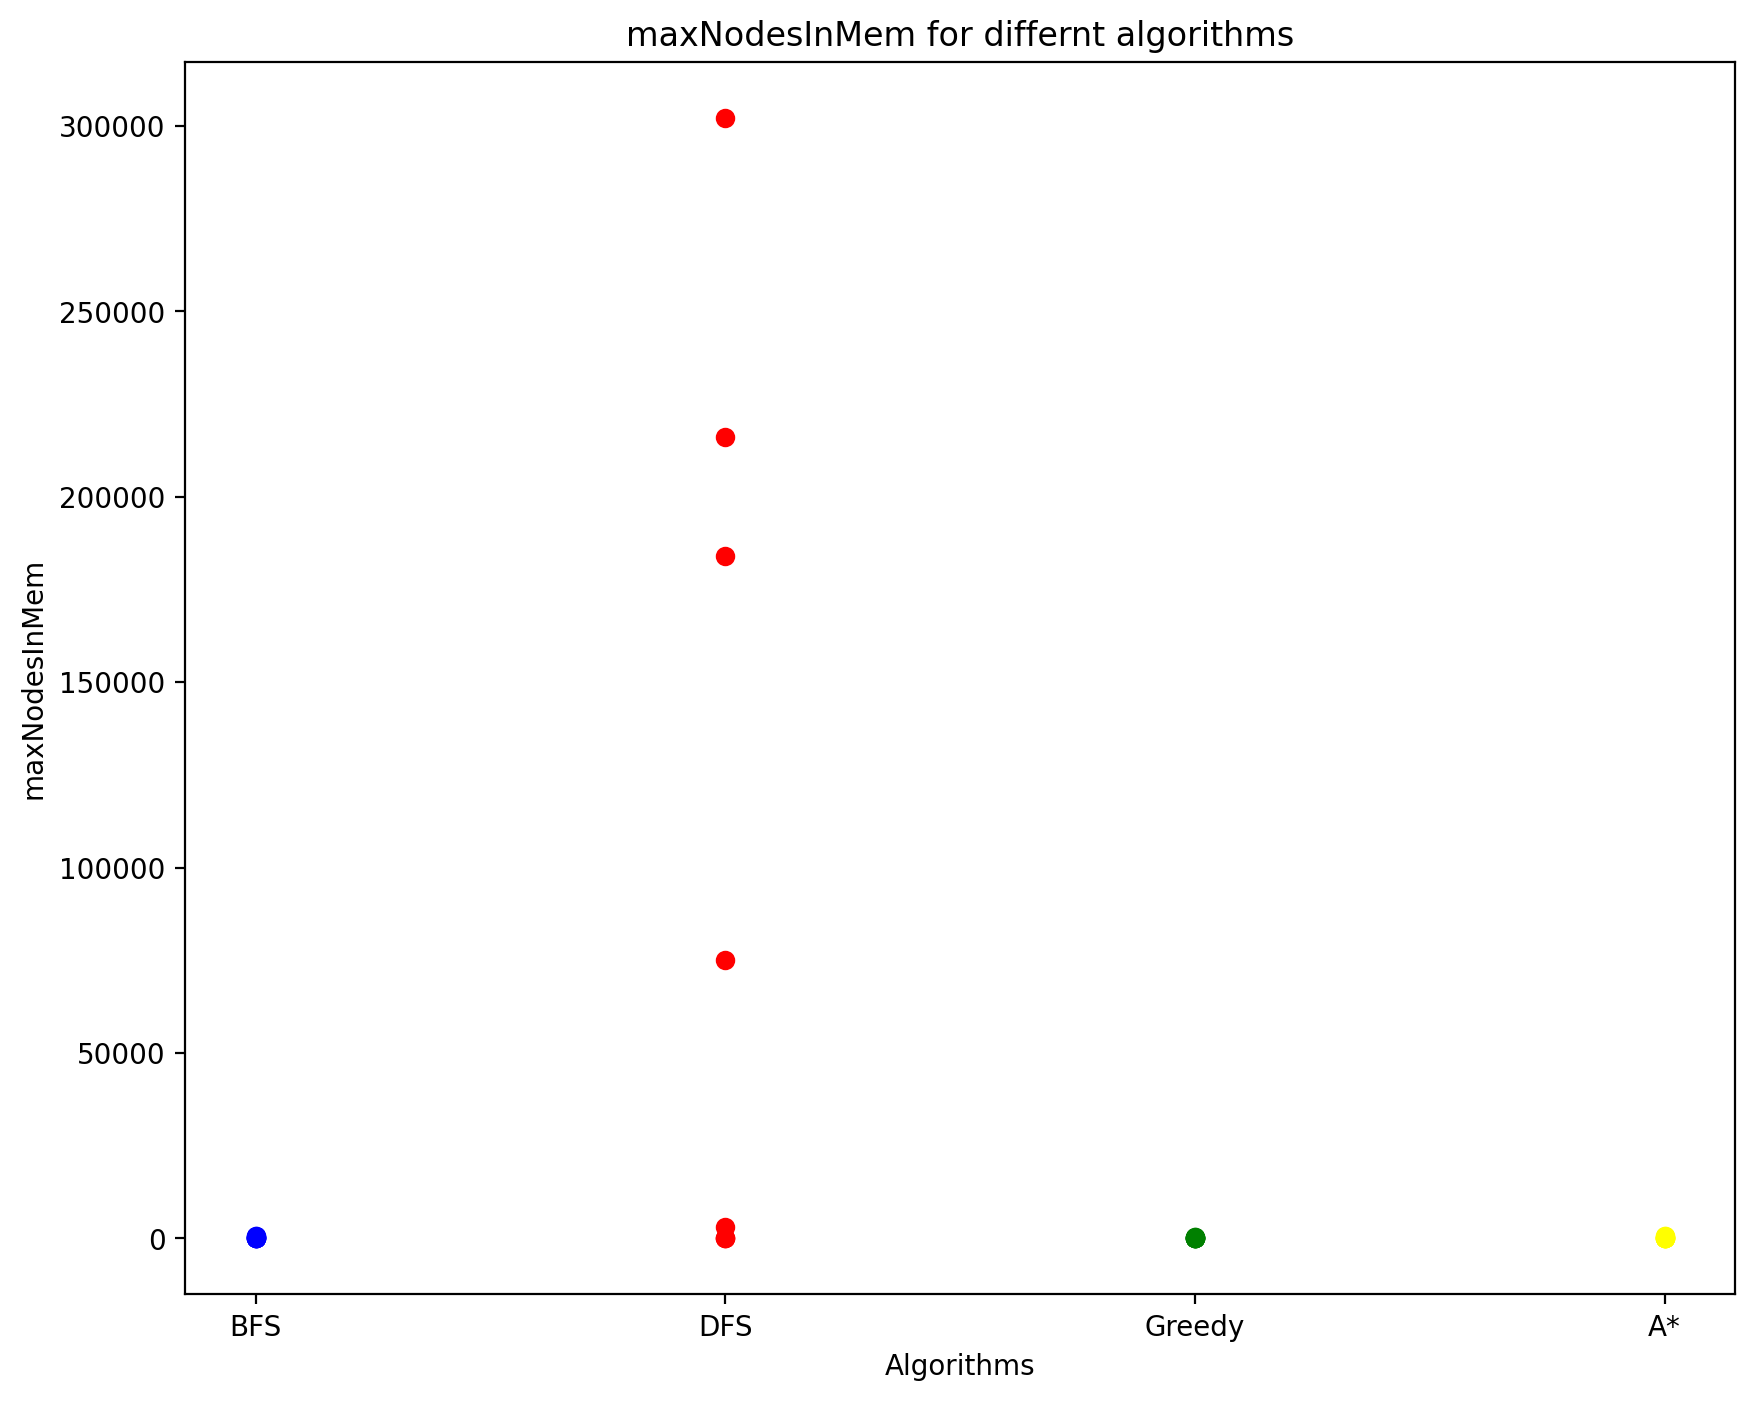

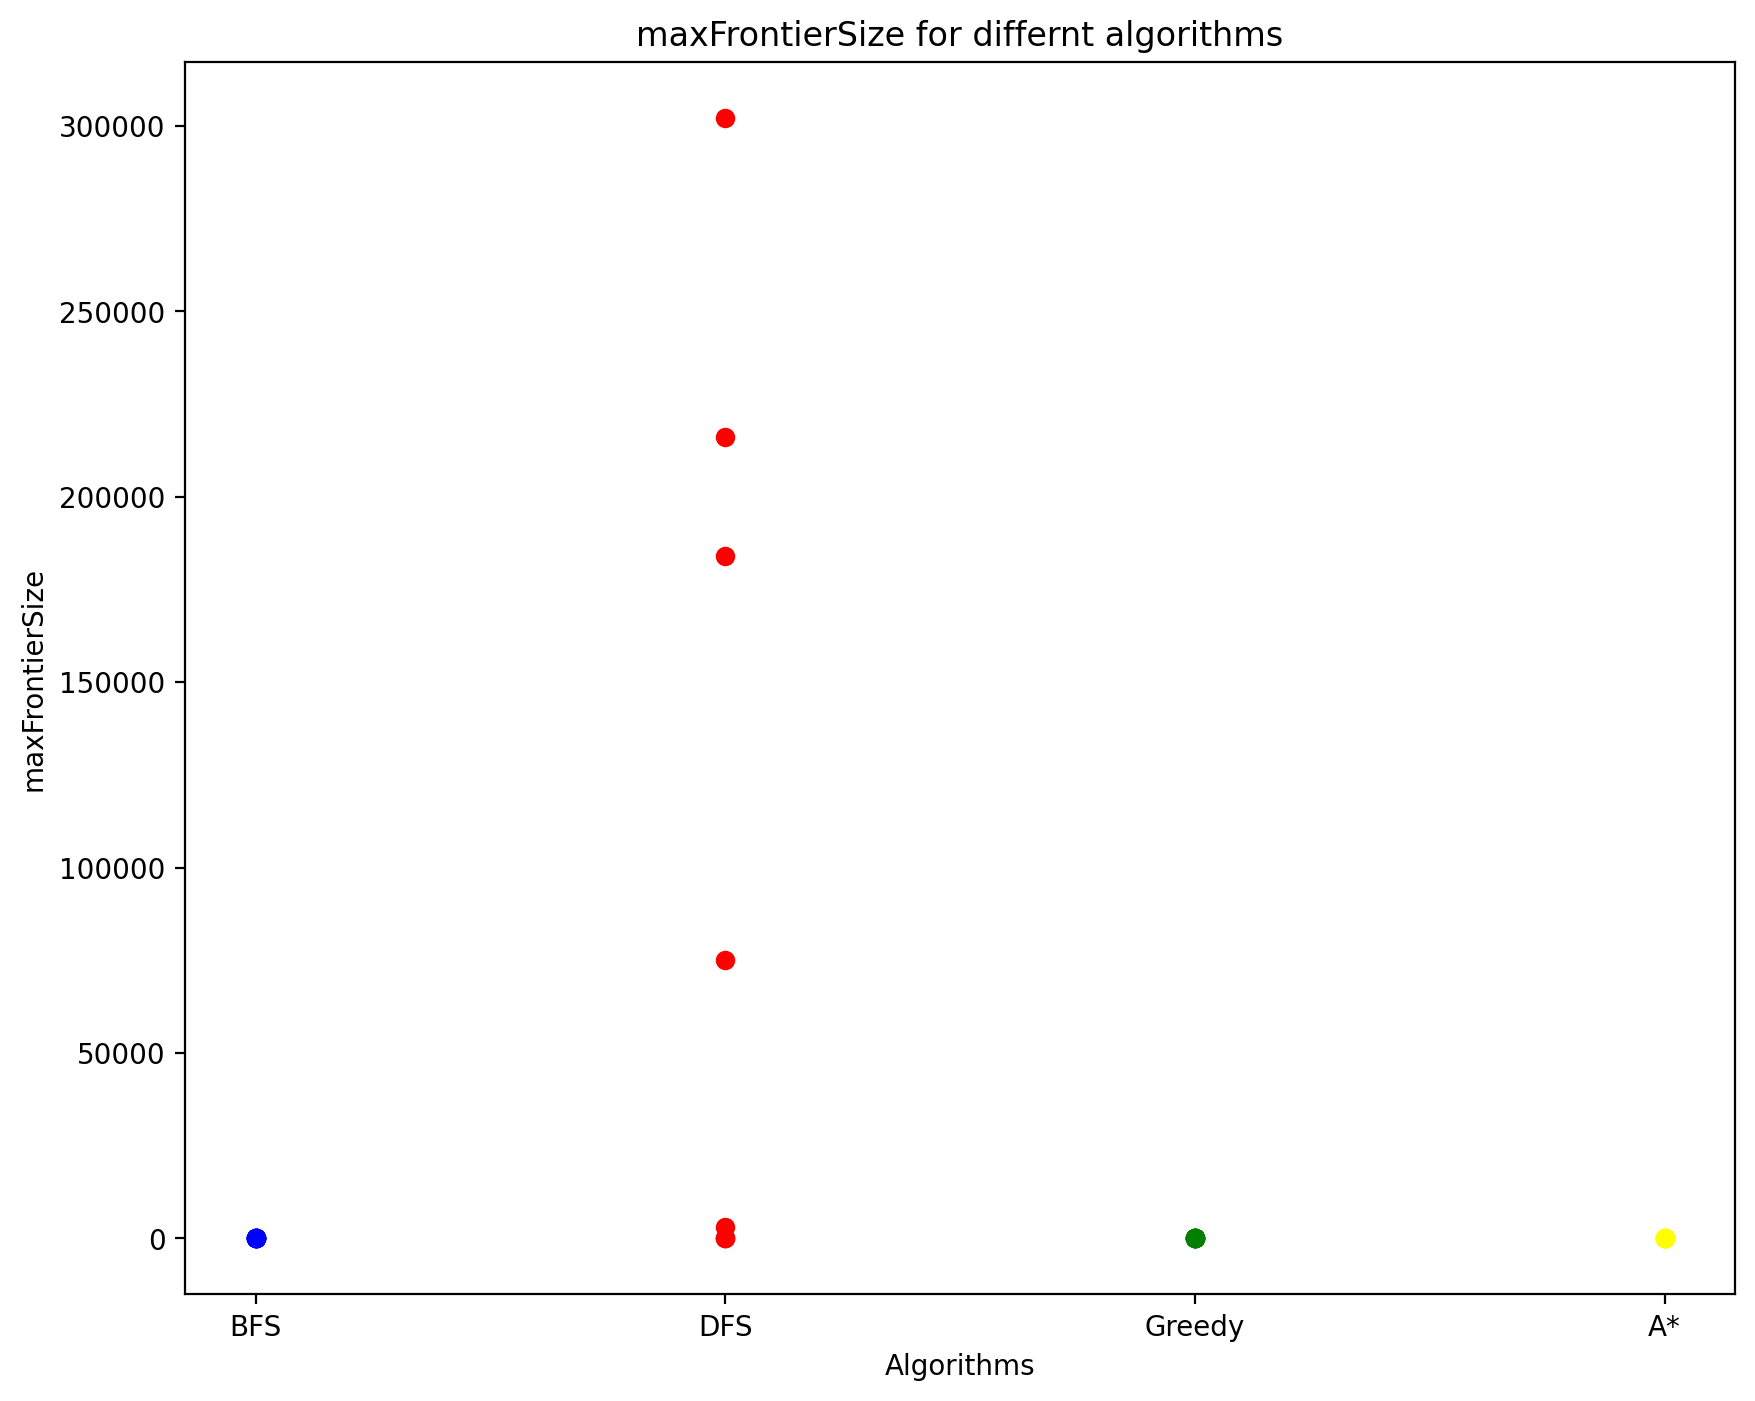

In [52]:
import matplotlib.pyplot as plt
for cat in bfsAverages.keys():
    plt.figure(figsize=(10, 8))  # Need to set before creating any chart or it won't change

    plt.scatter(['BFS']*len(bfsAverages[cat]) , bfsAverages[cat], color='blue', label='BFS' )
    plt.scatter(['DFS']*len(dfsAverages[cat]), dfsAverages[cat], color='red', label='DFS' )
    plt.scatter(['Greedy']*len(greedyAverages[cat]), greedyAverages[cat], color='green', label='Greedy')
    plt.scatter(['A*']*len(astarAverages[cat]), astarAverages[cat],color='yellow', label='A*')
    
    plt.xlabel('Algorithms')
    plt.ylabel(cat)
    plt.title(f'{cat} for different algorithms')
    plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies.

Each search method works well in certain situations, but does not work as well or not at all in other specific situations. It is quite interesting that all of these algorithms are quite similar to each other and can be based off of the same base algorithm, but may require minor changes here and there.

Each situation requires analysis to determine which algorithm is the best, as each algorithm has certain properties which may satisfy certain
constraints but not other constraints as well

---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.